# ВКР Соболева А.Е. Часть первая. Объединение, разведка, отрисовка диаграмм, очистка выбросов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

### Загружаем  датасеты сохраняя их названия и изучаем заголовки и статистику

In [2]:
X_bp = pd.read_excel(r"/home/alexander/Документы/BKP/X_bp.xlsx")
X_nup = pd.read_excel(r"/home/alexander/Документы/BKP/X_nup.xlsx")

In [3]:
X_bp.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0           0                         1.857143            2030.0   
1           1                         1.857143            2030.0   
2           2                         1.857143            2030.0   
3           3                         1.857143            2030.0   
4           4                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

In [4]:
Describe_X = X_bp.describe()
Describe_X.T

count         mean         std  \
Unnamed: 0                            1023.0   511.000000  295.458965   
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   

                                              min          25%          50%  \
Unnamed: 0                               0.000000   255.500000   511.000000   
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   

                                              75%          max  
Unnamed: 0                             766.500000  1022.000000  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628

In [5]:
Describe_X = X_nup.describe()
Describe_X.T

count        mean         std  min         25%  \
Unnamed: 0          1040.0  519.500000  300.366443  0.0  259.750000   
Угол нашивки, град  1040.0   45.000000   45.021650  0.0    0.000000   
Шаг нашивки         1040.0    6.911385    2.555181  0.0    5.102256   
Плотность нашивки   1040.0   57.248399   12.332438  0.0   49.970740   

                           50%         75%          max  
Unnamed: 0          519.500000  779.250000  1039.000000  
Угол нашивки, град   45.000000   90.000000    90.000000  
Шаг нашивки           6.938000    8.587662    14.440522  
Плотность нашивки    57.413594   65.107235   103.988901

In [6]:
X_nup.head()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0           0                   0          4.0               57.0
1           1                   0          4.0               60.0
2           2                   0          4.0               70.0
3           3                   0          5.0               47.0
4           4                   0          5.0               57.0

In [7]:
X_nup.duplicated().sum(axis=0)

0

#### Как видно из вывода X_bp.head() и X_nup.head(), первые столбцы "unnamed" в обоих файлах содержат номера строк. Их можно удалить без потери значимой информации

In [8]:
X_bp.shape

(1023, 11)

In [9]:
X_nup.shape

(1040, 4)

#### Датасеты имеют разный объем строк:  X_bp = 1023   X_nup = 1040 строк с одной строкой заголовка и при этом непонятно, из какой части файла были потеряны 17 строк.  Восстановить данные возможности нет, для выравнивания размеров датасетов удаляем из X_nup 17 строк.  
#### По заданию на ВКР,  имеющиеся части требуется объединить по типу INNER.

In [10]:
result = pd.concat([X_bp, X_nup], axis = 1, join="inner", ignore_index=False)

In [11]:
result.shape

(1023, 15)

In [14]:
result.tail()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  Unnamed: 0  \
1018                    2387.292495               125.007669        1018   
1019                    2360.392784               117.730099        1019   
1020                    2662.906040               236.606764        1020   
1021                    2071.715856               197.126067        1021   
1022                    2856.328932               194.754342        1022   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1018                  90     9.076380          47.019770  
1019                  90    10.565614          53.750790  
1020                  90     4.161154          67.629684  
1021                  90     6.313201          58.261074  
1022                  90     6.078902          77.434468

### Удаляем оба столбца 'Unnamed 0:' с номерами строк, так как их названия совпадают 

In [12]:
result.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
result.tail()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1018                  90     9.076380          47.019770  
1019                  90    10.565614          53.750790  
1020                  90     4.161154          67.629684  
1021                  90     6.313201          58.261074  
1022                  90     6.078902          77.434468

# Переходим к разведочному анализу.

### Проверяем информацию о типах данных в каждом столбце 

In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

### Типы переменных одинаковы  «float64» для всех столбцов иные типы отсутствуют. Пропуски данных отсутствуют, значений «NaN» нет. Объединенный файл имеет всего 1023 строки.

### Проверяем  наличие пропущенных значений

In [16]:
result.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

### Проверяем наличие дубликатов значений

In [17]:
result.duplicated().sum()

0

### Проверяем уникальность значений переменных по столбцам  датасета:

In [18]:
result.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

### Подсчитаем кол-во элементов с углами нашивки 0 и 90 градусов

In [19]:
result['Угол нашивки, град'][result['Угол нашивки, град'] == 0.0].count()

520

In [20]:
result['Угол нашивки, град'][result['Угол нашивки, град'] == 90.0].count()

503

### Приведём данные  в этой колонке к значениям 0 и 1, где 0 гр. = 0, 90 гр. = 1

In [21]:
result = result.replace({'Угол нашивки, град': {0.0 : 0}})
result = result.replace({'Угол нашивки, град': {90.0 : 1}})

### Для удобства укоротим длинные названия столбцов без потери информативности

In [23]:
result = result.rename(columns={'Соотношение матрица-наполнитель' : 'Пропорции, %',  
'Количество отвердителя, м.%' : 'Отвердитель, %', 'Содержание эпоксидных групп,%_2' : 'Эпокс. группы, %'})

### Преобразуем  тип данных   "Угол нашивки" к типу integer

In [24]:
result.index = result.index.astype(int)
result['Угол нашивки, град'] = result['Угол нашивки, град'].astype(int)

### Выведем на экран корреляционную матрицу по методу Пирсона

In [25]:
result.corr(method='pearson')

Пропорции, %  Плотность, кг/м3  \
Пропорции, %                              1.000000          0.003841   
Плотность, кг/м3                          0.003841          1.000000   
модуль упругости, ГПа                     0.031700         -0.009647   
Отвердитель, %                           -0.006445         -0.035911   
Эпокс. группы, %                          0.019766         -0.008278   
Температура вспышки, С_2                 -0.004776         -0.020695   
Поверхностная плотность, г/м2            -0.006272          0.044930   
Модуль упругости при растяжении, ГПа     -0.008411         -0.017602   
Прочность при растяжении, МПа             0.024148         -0.069981   
Потребление смолы, г/м2                   0.072531         -0.015937   
Угол нашивки, град                       -0.031073         -0.068474   
Шаг нашивки                               0.036437         -0.061015   
Плотность нашивки                        -0.004652          0.080304   

                                      модуль упругости, ГПа  Отвердитель, %  \
Пропорции, %                                       0.031700       -0.006445   
Плотность, кг/м3                                  -0.009647       -0.035911   
модуль упругости, ГПа                              1.000000        0.024049   
Отвердитель, %                                     0.024049        1.000000   
Эпокс. группы, %                                  -0.006804       -0.000684   
Температура вспышки, С_2                           0.031174        0.095193   
Поверхностная плотность, г/м2                     -0.005306        0.055198   
Модуль упругости при растяжении, ГПа               0.023267       -0.065929   
Прочность при растяжении, МПа                      0.041868       -0.075375   
Потребление смолы, г/м2                            0.001840        0.007446   
Угол нашивки, град                                -0.025417        0.038570   
Шаг нашивки                                       -0.009875        0.014887   
Плотность нашивки                                  0.056346        0.017248   

                                      Эпокс. группы, %  \
Пропорции, %                                  0.019766   
Плотность, кг/м3                             -0.008278   
модуль упругости, ГПа                        -0.006804   
Отвердитель, %                               -0.000684   
Эпокс. группы, %                              1.000000   
Температура вспышки, С_2                     -0.009769   
Поверхностная плотность, г/м2                -0.012940   
Модуль упругости при растяжении, ГПа          0.056828   
Прочность при растяжении, МПа                -0.023899   
Потребление смолы, г/м2                       0.015165   
Угол нашивки, град                            0.008052   
Шаг нашивки                                   0.003022   
Плотность нашивки                            -0.039073   

                                      Температура вспышки, С_2  \
Пропорции, %                                         -0.004776   
Плотность, кг/м3                                     -0.020695   
модуль упругости, ГПа                                 0.031174   
Отвердитель, %                                        0.095193   
Эпокс. группы, %                                     -0.009769   
Температура вспышки, С_2                              1.000000   
Поверхностная плотность, г/м2                         0.020121   
Модуль упругости при растяжении, ГПа                  0.028414   
Прочность при растяжении, МПа                        -0.031763   
Потребление смолы, г/м2                               0.059954   
Угол нашивки, град                                    0.020695   
Шаг нашивки                                           0.025795   
Плотность нашивки                                     0.011391   

                                      Поверхностная плотность, г/м2  \
Пропорции, %                                              -0.006272   
Плотность, кг/м3                          

### Выведем на экран корреляционную матрицу по методу Кендалла

In [26]:
result.corr(method='kendall')

Пропорции, %  Плотность, кг/м3  \
Пропорции, %                              1.000000         -0.003135   
Плотность, кг/м3                         -0.003135          1.000000   
модуль упругости, ГПа                     0.021247         -0.008059   
Отвердитель, %                            0.001410         -0.021963   
Эпокс. группы, %                          0.010180         -0.007758   
Температура вспышки, С_2                 -0.009480         -0.019947   
Поверхностная плотность, г/м2            -0.002060          0.037302   
Модуль упругости при растяжении, ГПа     -0.004157         -0.021151   
Прочность при растяжении, МПа             0.011614         -0.047426   
Потребление смолы, г/м2                   0.035145         -0.017079   
Угол нашивки, град                       -0.021395         -0.051525   
Шаг нашивки                               0.022723         -0.031220   
Плотность нашивки                         0.002788          0.052935   

                                      модуль упругости, ГПа  Отвердитель, %  \
Пропорции, %                                       0.021247        0.001410   
Плотность, кг/м3                                  -0.008059       -0.021963   
модуль упругости, ГПа                              1.000000        0.022382   
Отвердитель, %                                     0.022382        1.000000   
Эпокс. группы, %                                   0.002351        0.000010   
Температура вспышки, С_2                           0.021028        0.059034   
Поверхностная плотность, г/м2                     -0.000442        0.033110   
Модуль упругости при растяжении, ГПа               0.005458       -0.043140   
Прочность при растяжении, МПа                      0.022959       -0.046507   
Потребление смолы, г/м2                            0.005169       -0.003677   
Угол нашивки, град                                -0.031695        0.024690   
Шаг нашивки                                       -0.008305        0.006232   
Плотность нашивки                                  0.049347        0.016607   

                                      Эпокс. группы, %  \
Пропорции, %                                  0.010180   
Плотность, кг/м3                             -0.007758   
модуль упругости, ГПа                         0.002351   
Отвердитель, %                                0.000010   
Эпокс. группы, %                              1.000000   
Температура вспышки, С_2                     -0.002170   
Поверхностная плотность, г/м2                -0.006859   
Модуль упругости при растяжении, ГПа          0.041994   
Прочность при растяжении, МПа                -0.013441   
Потребление смолы, г/м2                       0.009756   
Угол нашивки, град                            0.004668   
Шаг нашивки                                  -0.004539   
Плотность нашивки                            -0.021968   

                                      Температура вспышки, С_2  \
Пропорции, %                                         -0.009480   
Плотность, кг/м3                                     -0.019947   
модуль упругости, ГПа                                 0.021028   
Отвердитель, %                                        0.059034   
Эпокс. группы, %                                     -0.002170   
Температура вспышки, С_2                              1.000000   
Поверхностная плотность, г/м2                         0.017196   
Модуль упругости при растяжении, ГПа                  0.016481   
Прочность при растяжении, МПа                        -0.019106   
Потребление смолы, г/м2                               0.035313   
Угол нашивки, град                                    0.017880   
Шаг нашивки                                           0.029552   
Плотность нашивки                                     0.005268   

                                      Поверхностная плотность, г/м2  \
Пропорции, %                                              -0.002060   
Плотность, кг/м3                          

### Выведем на экран корреляционную матрицу по методу Спермана

In [27]:
result.corr(method='spearman')

Пропорции, %  Плотность, кг/м3  \
Пропорции, %                              1.000000         -0.005542   
Плотность, кг/м3                         -0.005542          1.000000   
модуль упругости, ГПа                     0.031823         -0.010097   
Отвердитель, %                            0.002496         -0.032907   
Эпокс. группы, %                          0.016358         -0.012287   
Температура вспышки, С_2                 -0.013635         -0.030447   
Поверхностная плотность, г/м2            -0.003896          0.055071   
Модуль упругости при растяжении, ГПа     -0.006459         -0.032446   
Прочность при растяжении, МПа             0.017554         -0.069816   
Потребление смолы, г/м2                   0.054084         -0.025729   
Угол нашивки, град                       -0.026190         -0.063073   
Шаг нашивки                               0.032510         -0.045941   
Плотность нашивки                         0.004570          0.080001   

                                      модуль упругости, ГПа  Отвердитель, %  \
Пропорции, %                                       0.031823        0.002496   
Плотность, кг/м3                                  -0.010097       -0.032907   
модуль упругости, ГПа                              1.000000        0.033397   
Отвердитель, %                                     0.033397        1.000000   
Эпокс. группы, %                                   0.002016       -0.001652   
Температура вспышки, С_2                           0.031247        0.086970   
Поверхностная плотность, г/м2                     -0.001318        0.050751   
Модуль упругости при растяжении, ГПа               0.007705       -0.064127   
Прочность при растяжении, МПа                      0.033750       -0.067707   
Потребление смолы, г/м2                            0.008010       -0.006371   
Угол нашивки, град                                -0.038800        0.030222   
Шаг нашивки                                       -0.011851        0.008440   
Плотность нашивки                                  0.072628        0.025265   

                                      Эпокс. группы, %  \
Пропорции, %                                  0.016358   
Плотность, кг/м3                             -0.012287   
модуль упругости, ГПа                         0.002016   
Отвердитель, %                               -0.001652   
Эпокс. группы, %                              1.000000   
Температура вспышки, С_2                     -0.003641   
Поверхностная плотность, г/м2                -0.011232   
Модуль упругости при растяжении, ГПа          0.061930   
Прочность при растяжении, МПа                -0.019193   
Потребление смолы, г/м2                       0.014230   
Угол нашивки, град                            0.005714   
Шаг нашивки                                  -0.007421   
Плотность нашивки                            -0.032182   

                                      Температура вспышки, С_2  \
Пропорции, %                                         -0.013635   
Плотность, кг/м3                                     -0.030447   
модуль упругости, ГПа                                 0.031247   
Отвердитель, %                                        0.086970   
Эпокс. группы, %                                     -0.003641   
Температура вспышки, С_2                              1.000000   
Поверхностная плотность, г/м2                         0.025441   
Модуль упругости при растяжении, ГПа                  0.024625   
Прочность при растяжении, МПа                        -0.028283   
Потребление смолы, г/м2                               0.051763   
Угол нашивки, град                                    0.021886   
Шаг нашивки                                           0.043075   
Плотность нашивки                                     0.008160   

                                      Поверхностная плотность, г/м2  \
Пропорции, %                                              -0.003896   
Плотность, кг/м3                          

### И нарисуем тепловую карту взаимной корреляции параметров

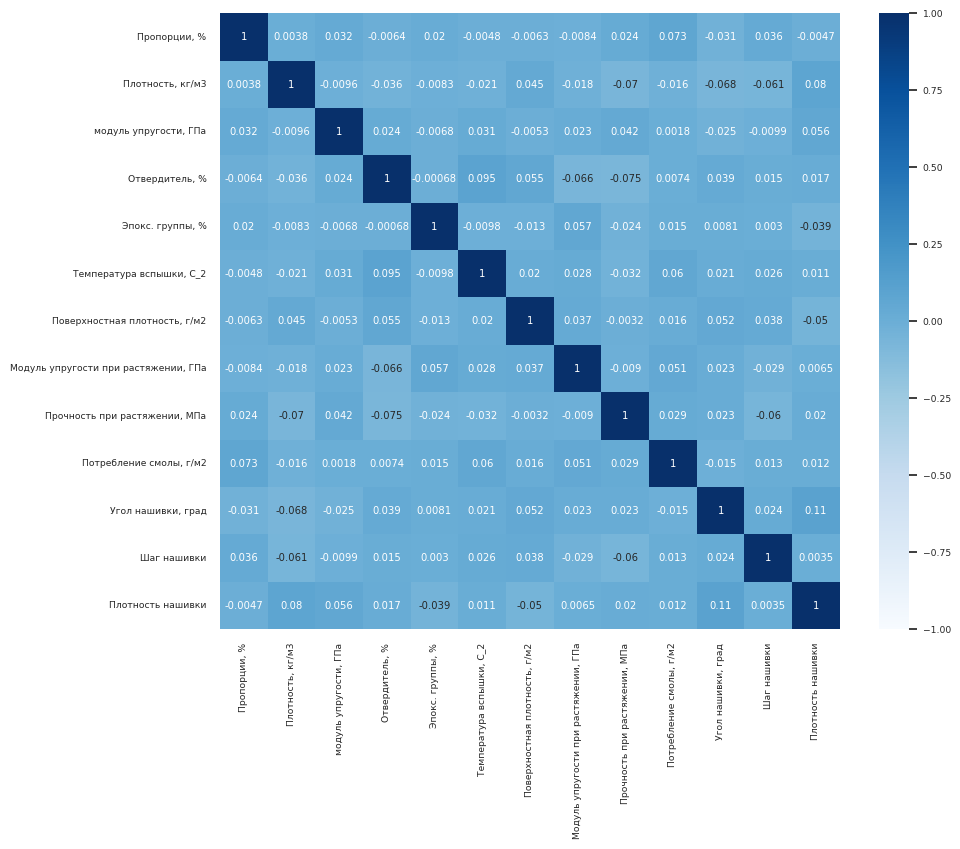

In [38]:
sns.set(font_scale=0.6)
plt.figure(figsize=(10,8))
sns.heatmap(result.corr(method='pearson'), cmap='Blues', annot=True, vmin=-1, vmax=1); 


### По заданию необходимо получить среднее и медианное значение для каждой колонки

In [28]:
result.mean()

Пропорции, %                               2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Отвердитель, %                           110.570769
Эпокс. группы, %                          22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                         0.491691
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [29]:
result.median()

Пропорции, %                               2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Отвердитель, %                           110.564840
Эпокс. группы, %                          22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

### Рисуем гистограммы распределения переменных при помощи pandas

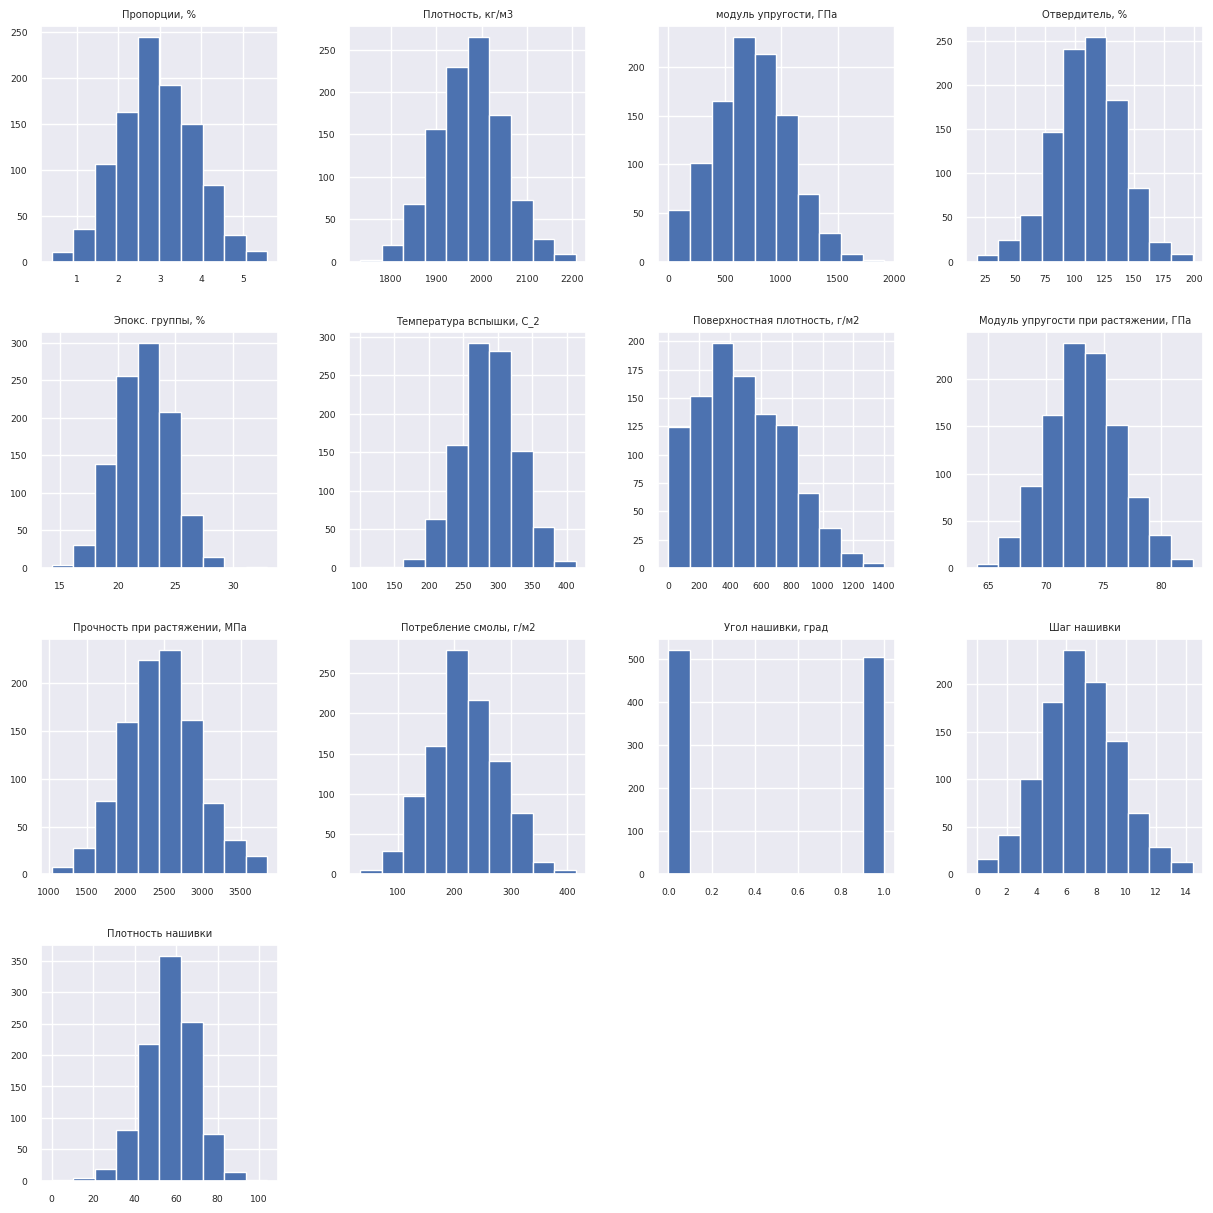

In [44]:
from typing import Any
from pandas.core.frame import IndexLabel
result.hist(figsize = (15,15), color = "b")
plt.show()

### Гистограммы показывают распределения, похожие на нормальные. 


### Построим гистограммы с использованием seaborn. Определяем для каждой переменной свой график, переменных в датасете 13 и рисуем по три гистограммы по горизонтали и в пять строк по вертикали. Дополнительно рисуем огибающую, установив в sns.hisplot параметр kde=True

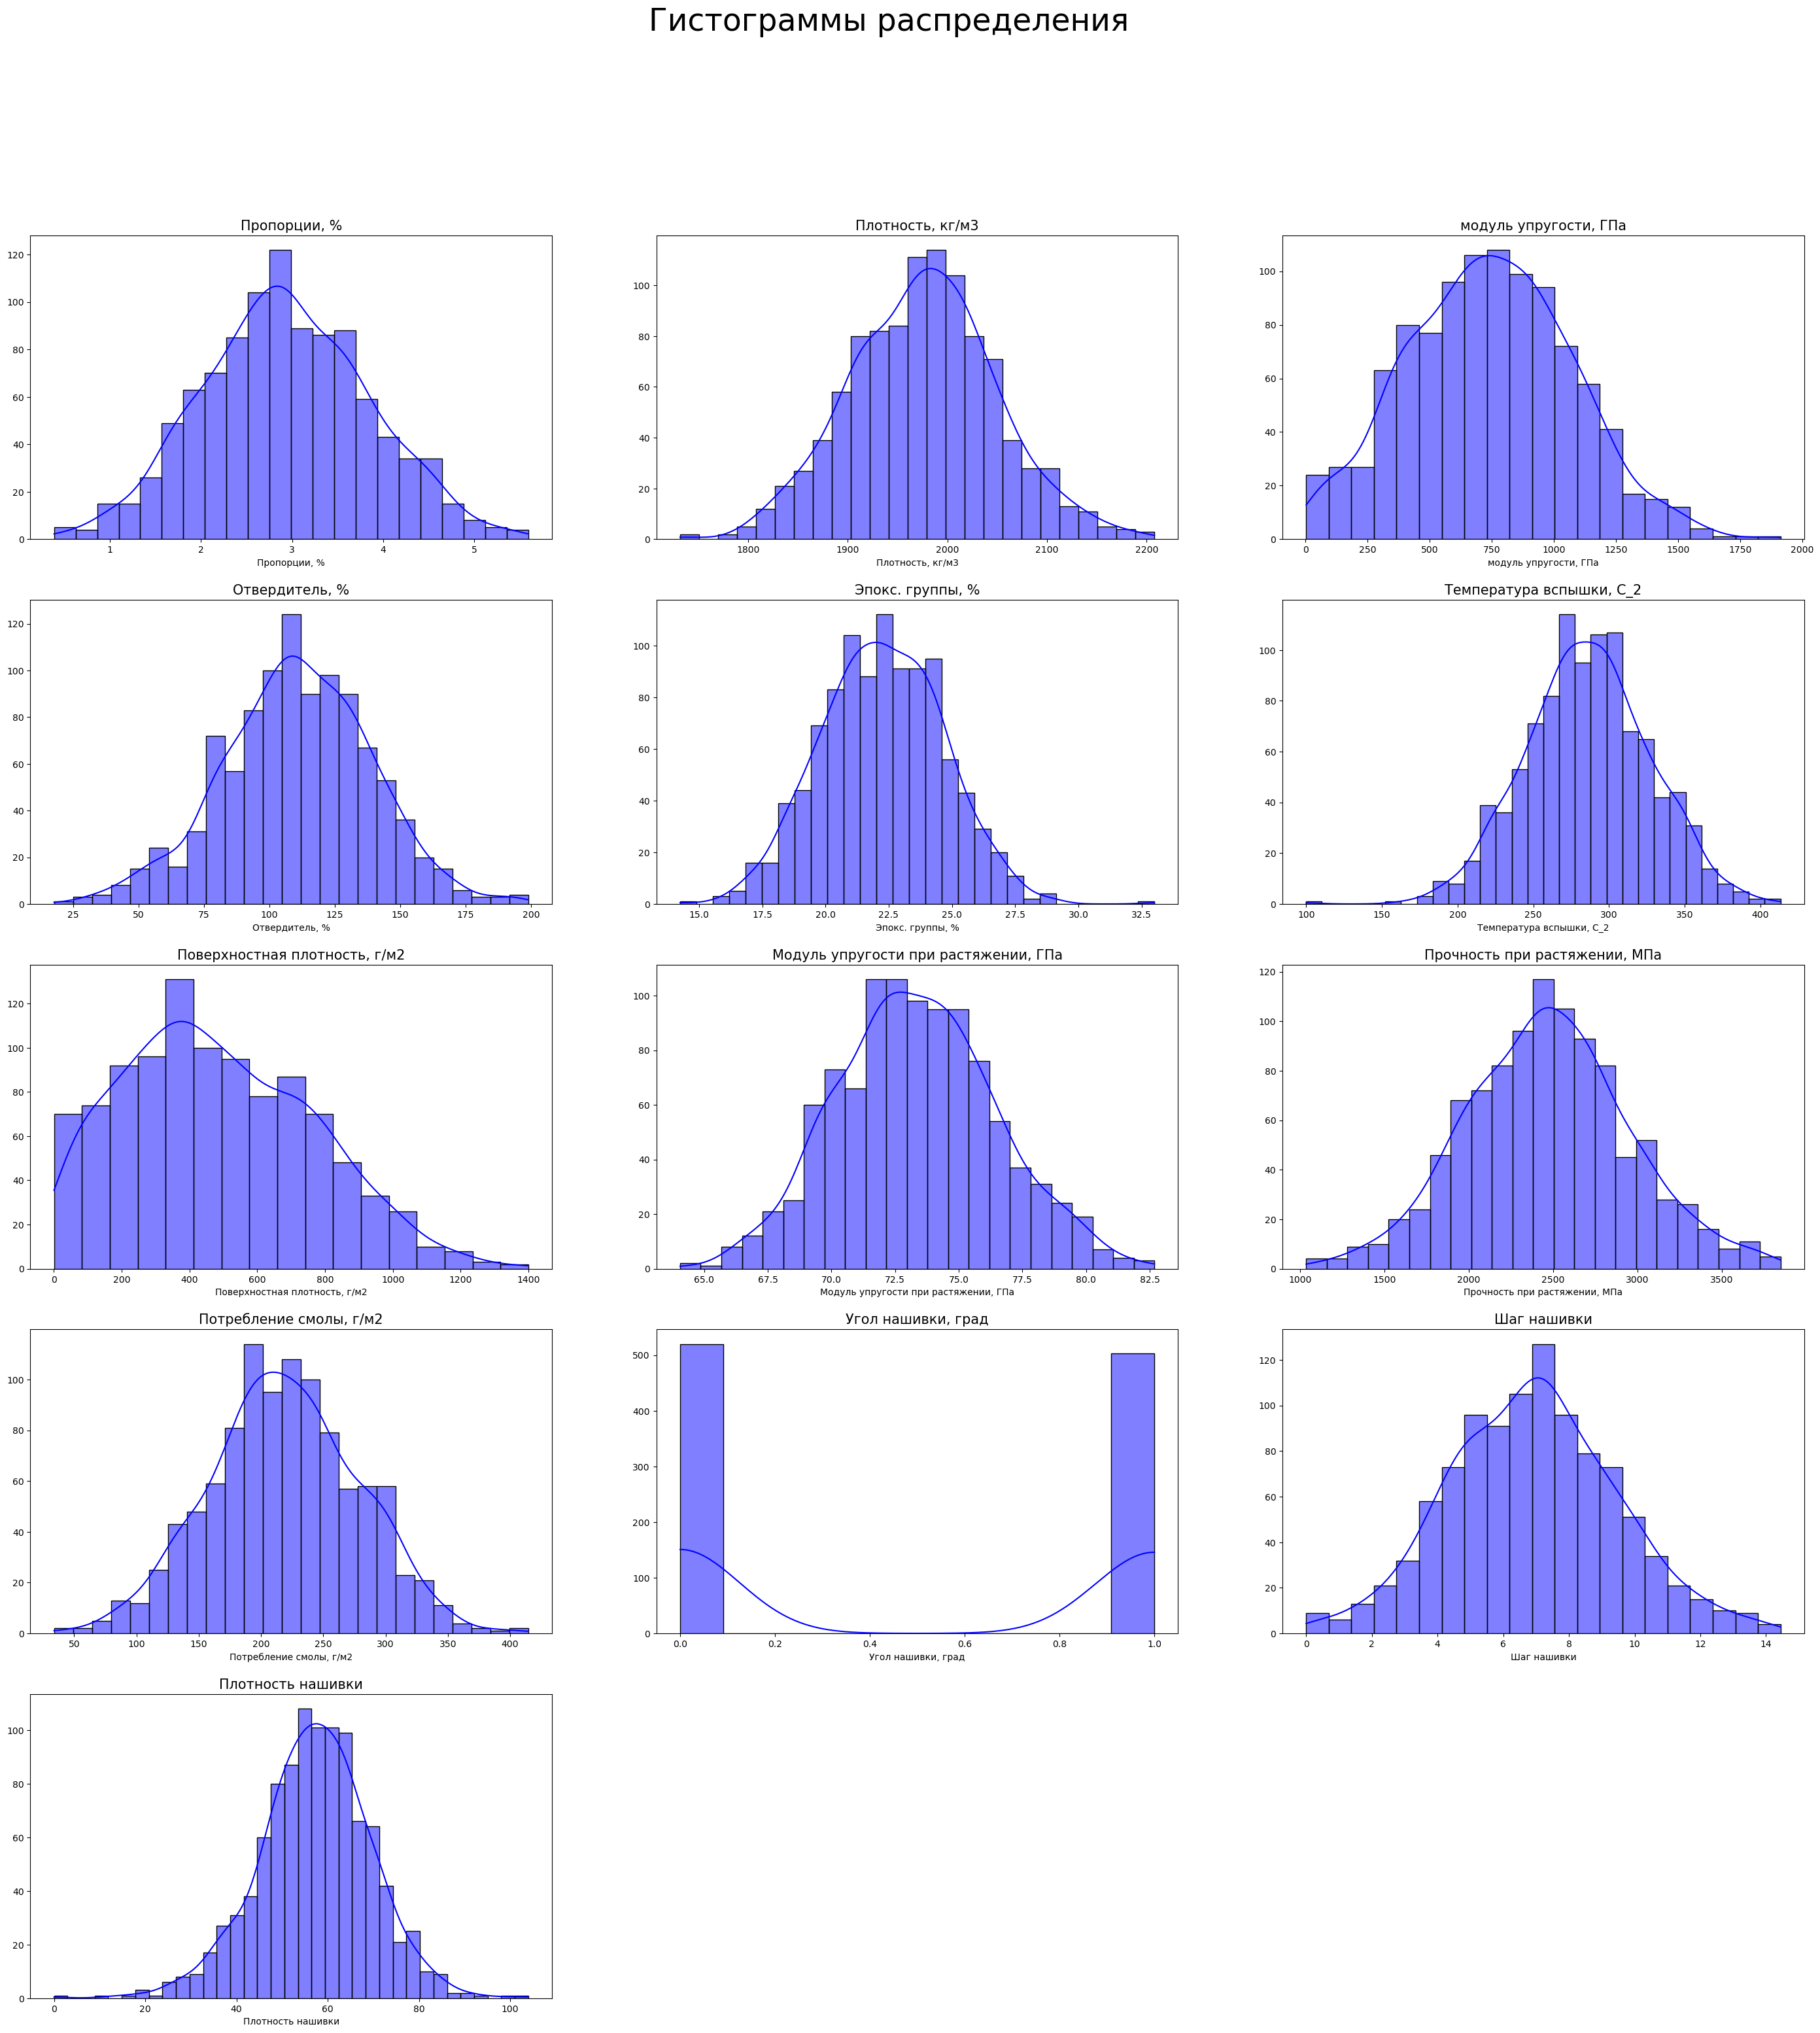

In [30]:
x = 5 # строки
y = 3 # столбцы
count1 = 1 # счётчик рисунков
plt.figure(figsize = (35,35))
plt.suptitle(' Гистограммы распределения ', fontsize = 34)
for cl in result.columns:
  plt.subplot(x, y, count1)
  sns.histplot(data = result[cl], kde=True, color = "blue")
  plt.ylabel(None)
  plt.title(cl, size = 15)
  count1 += 1

### Парные диаграммы

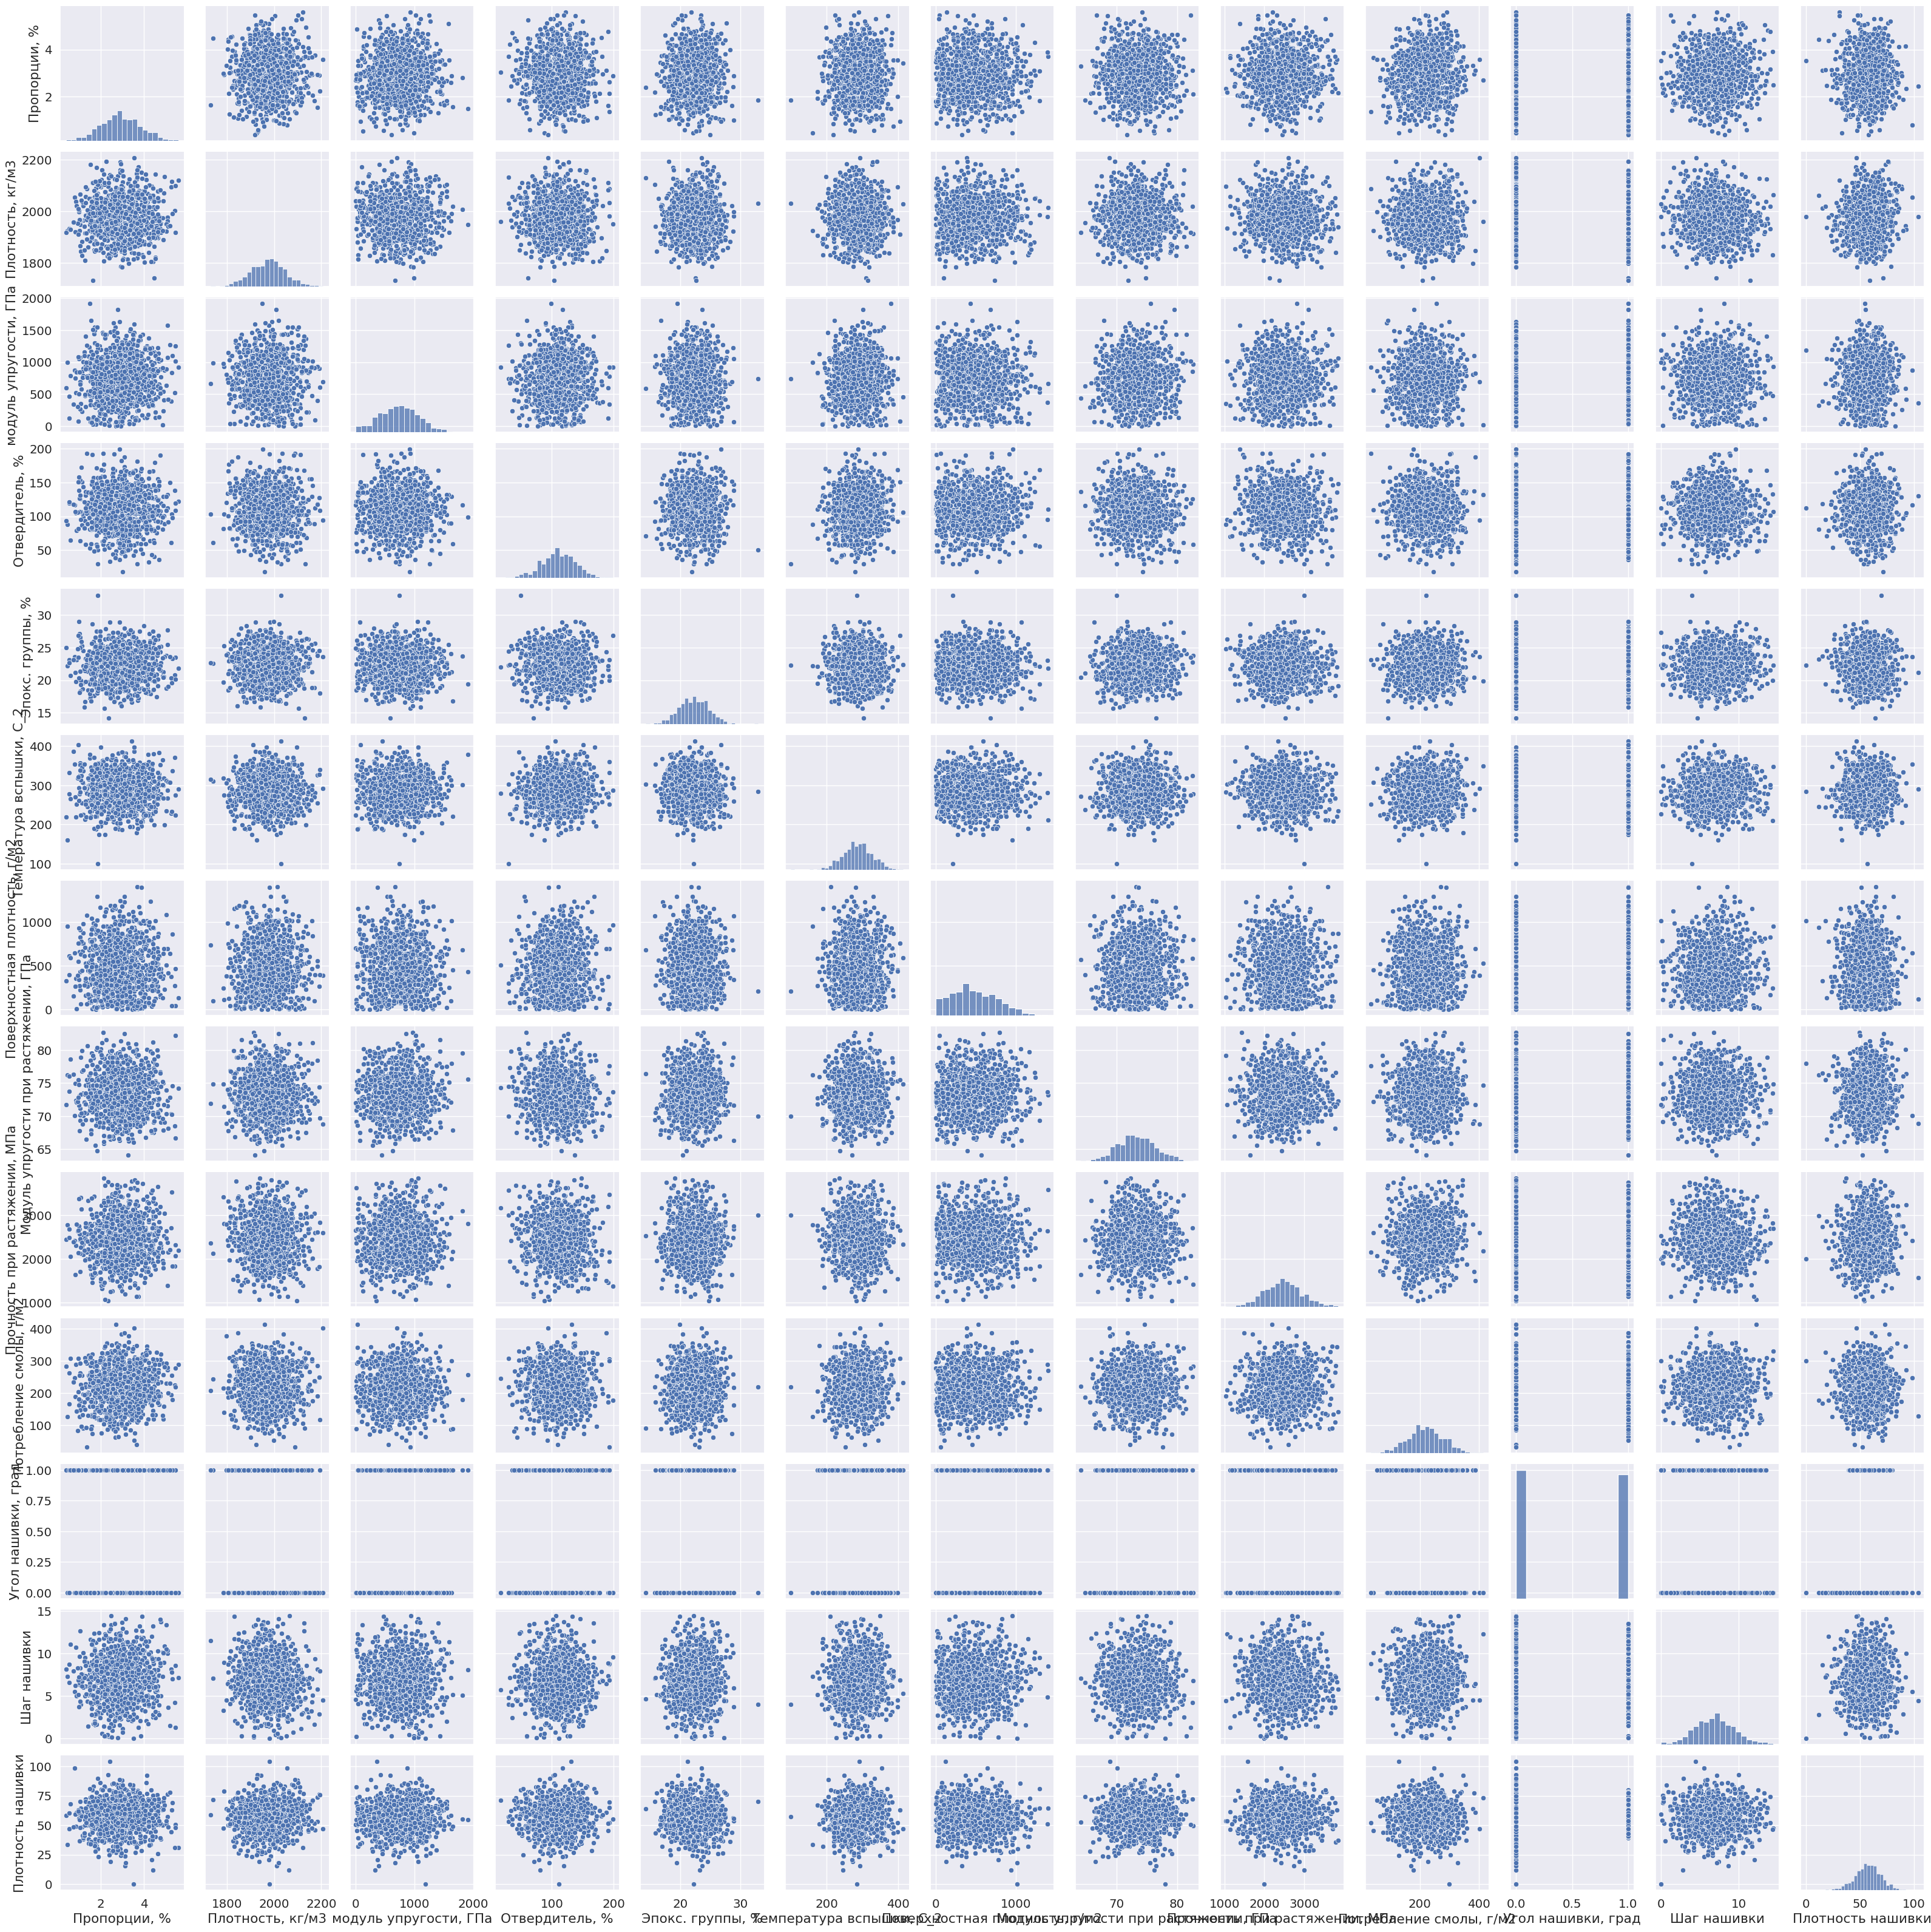

In [46]:
sns.set_style('darkgrid')

sns.set(font_scale=1.3)

sns.pairplot(data=result); # hue='cat_col' подсвечивает указанную категорию другим цветом.

#### как можно видеть, на попарных на диаграммах отсутствуют корреляционные зависимости переменных друг от друга,  все графики примерно округлой формы и регрессии не просматриваются. 

#### Возможно есть зависимости плотности нашивки от шага нашивки и плотности нашивки от модуля упругости при растяжении, что может иметь физический смысл 

#### Покрупнее нарисуем отдельное распределение данных для параметра "Плотность нашивки"

<AxesSubplot: xlabel='Плотность нашивки', ylabel='Count'>

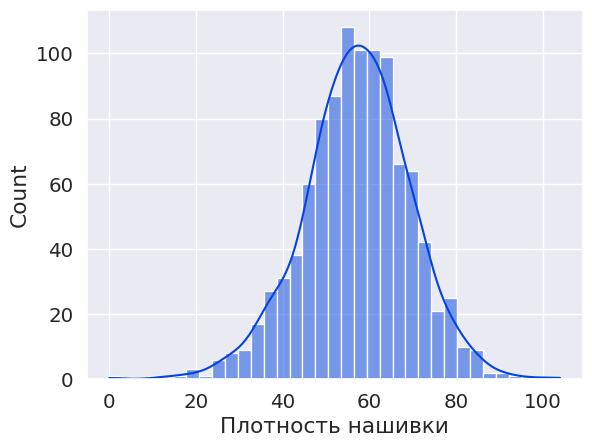

In [47]:
sns.histplot(data = result["Плотность нашивки"], kde=True, color = "#0343df")

#### И покрупнее нарисуем отдельное распределение данных для параметра "Модуль упругости при растяжении, ГПа"

<AxesSubplot: xlabel='Модуль упругости при растяжении, ГПа', ylabel='Count'>

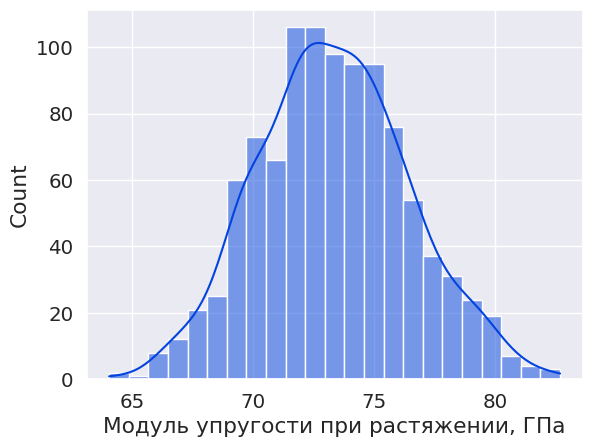

In [48]:
sns.histplot(data = result["Модуль упругости при растяжении, ГПа"], kde=True, color = "#0343df")

#### Дополнительно нарисуем крупным планом парную зависимость для параметров 'Модуль упругости при растяжении, ГПа' и 'Плотность нашивки'

Text(0, 0.5, 'Плотность нашивки')

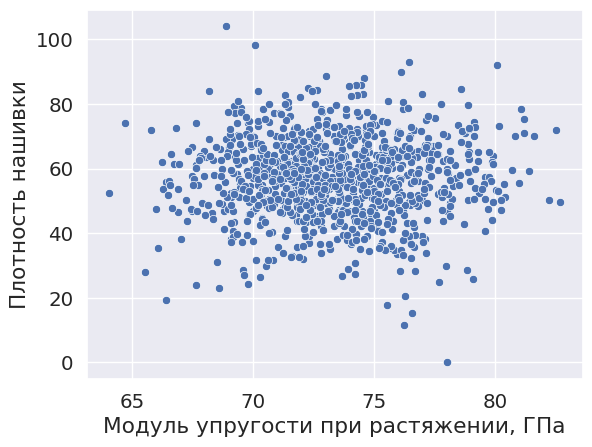

In [49]:
sns.set(font_scale=1.3)
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.scatterplot(x='Модуль упругости при растяжении, ГПа',  y='Плотность нашивки', data=result)
plt.xlabel('Модуль упругости при растяжении, ГПа')
plt.ylabel('Плотность нашивки')

#### Нарисуем графики QQ и посмотрим, соответствует ли набор данных нормальному распределению

In [31]:
from scipy import stats

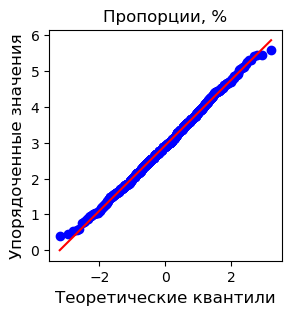

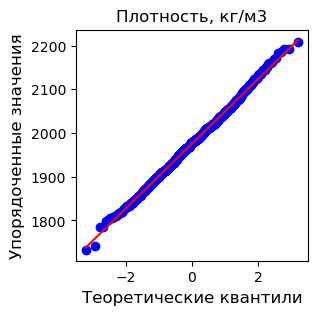

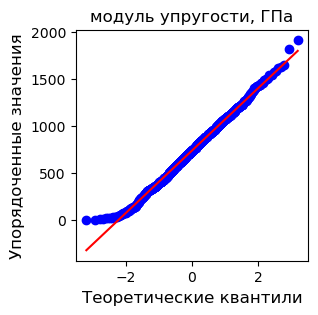

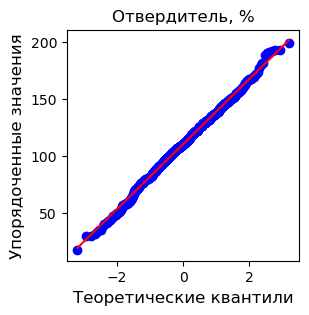

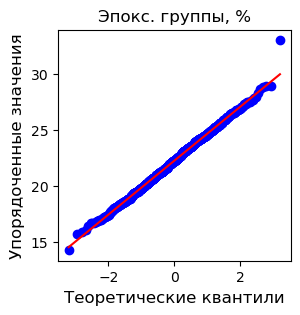

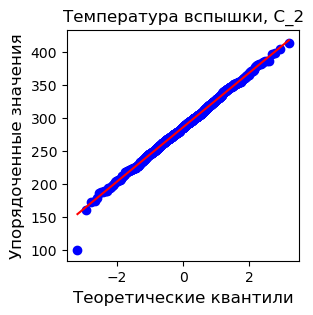

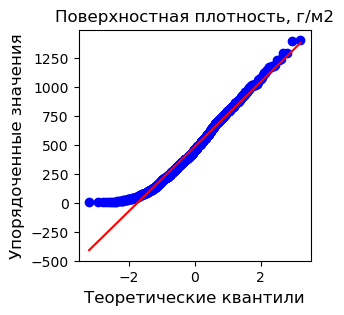

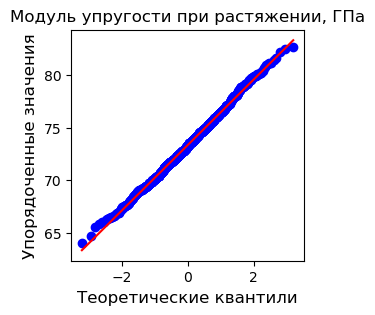

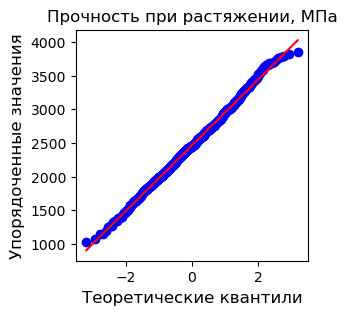

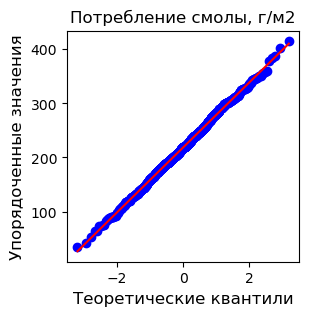

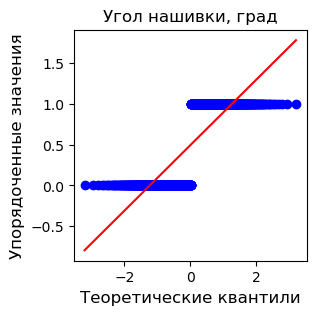

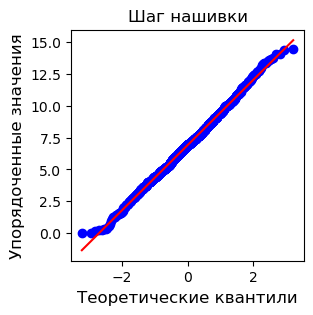

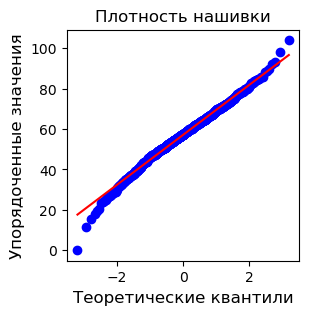

In [43]:
# график qq
for iq in result.columns:
    plt.figure(figsize = (3, 3))
    stats.probplot(result[iq], plot = plt)
    plt.title(iq, fontsize = 12)
    plt.xlabel("Теоретические квантили", fontsize = 12)
    plt.ylabel("Упорядоченные значения", fontsize = 12)
    plt.show()

### Аналогично отрисовываем Box Plot

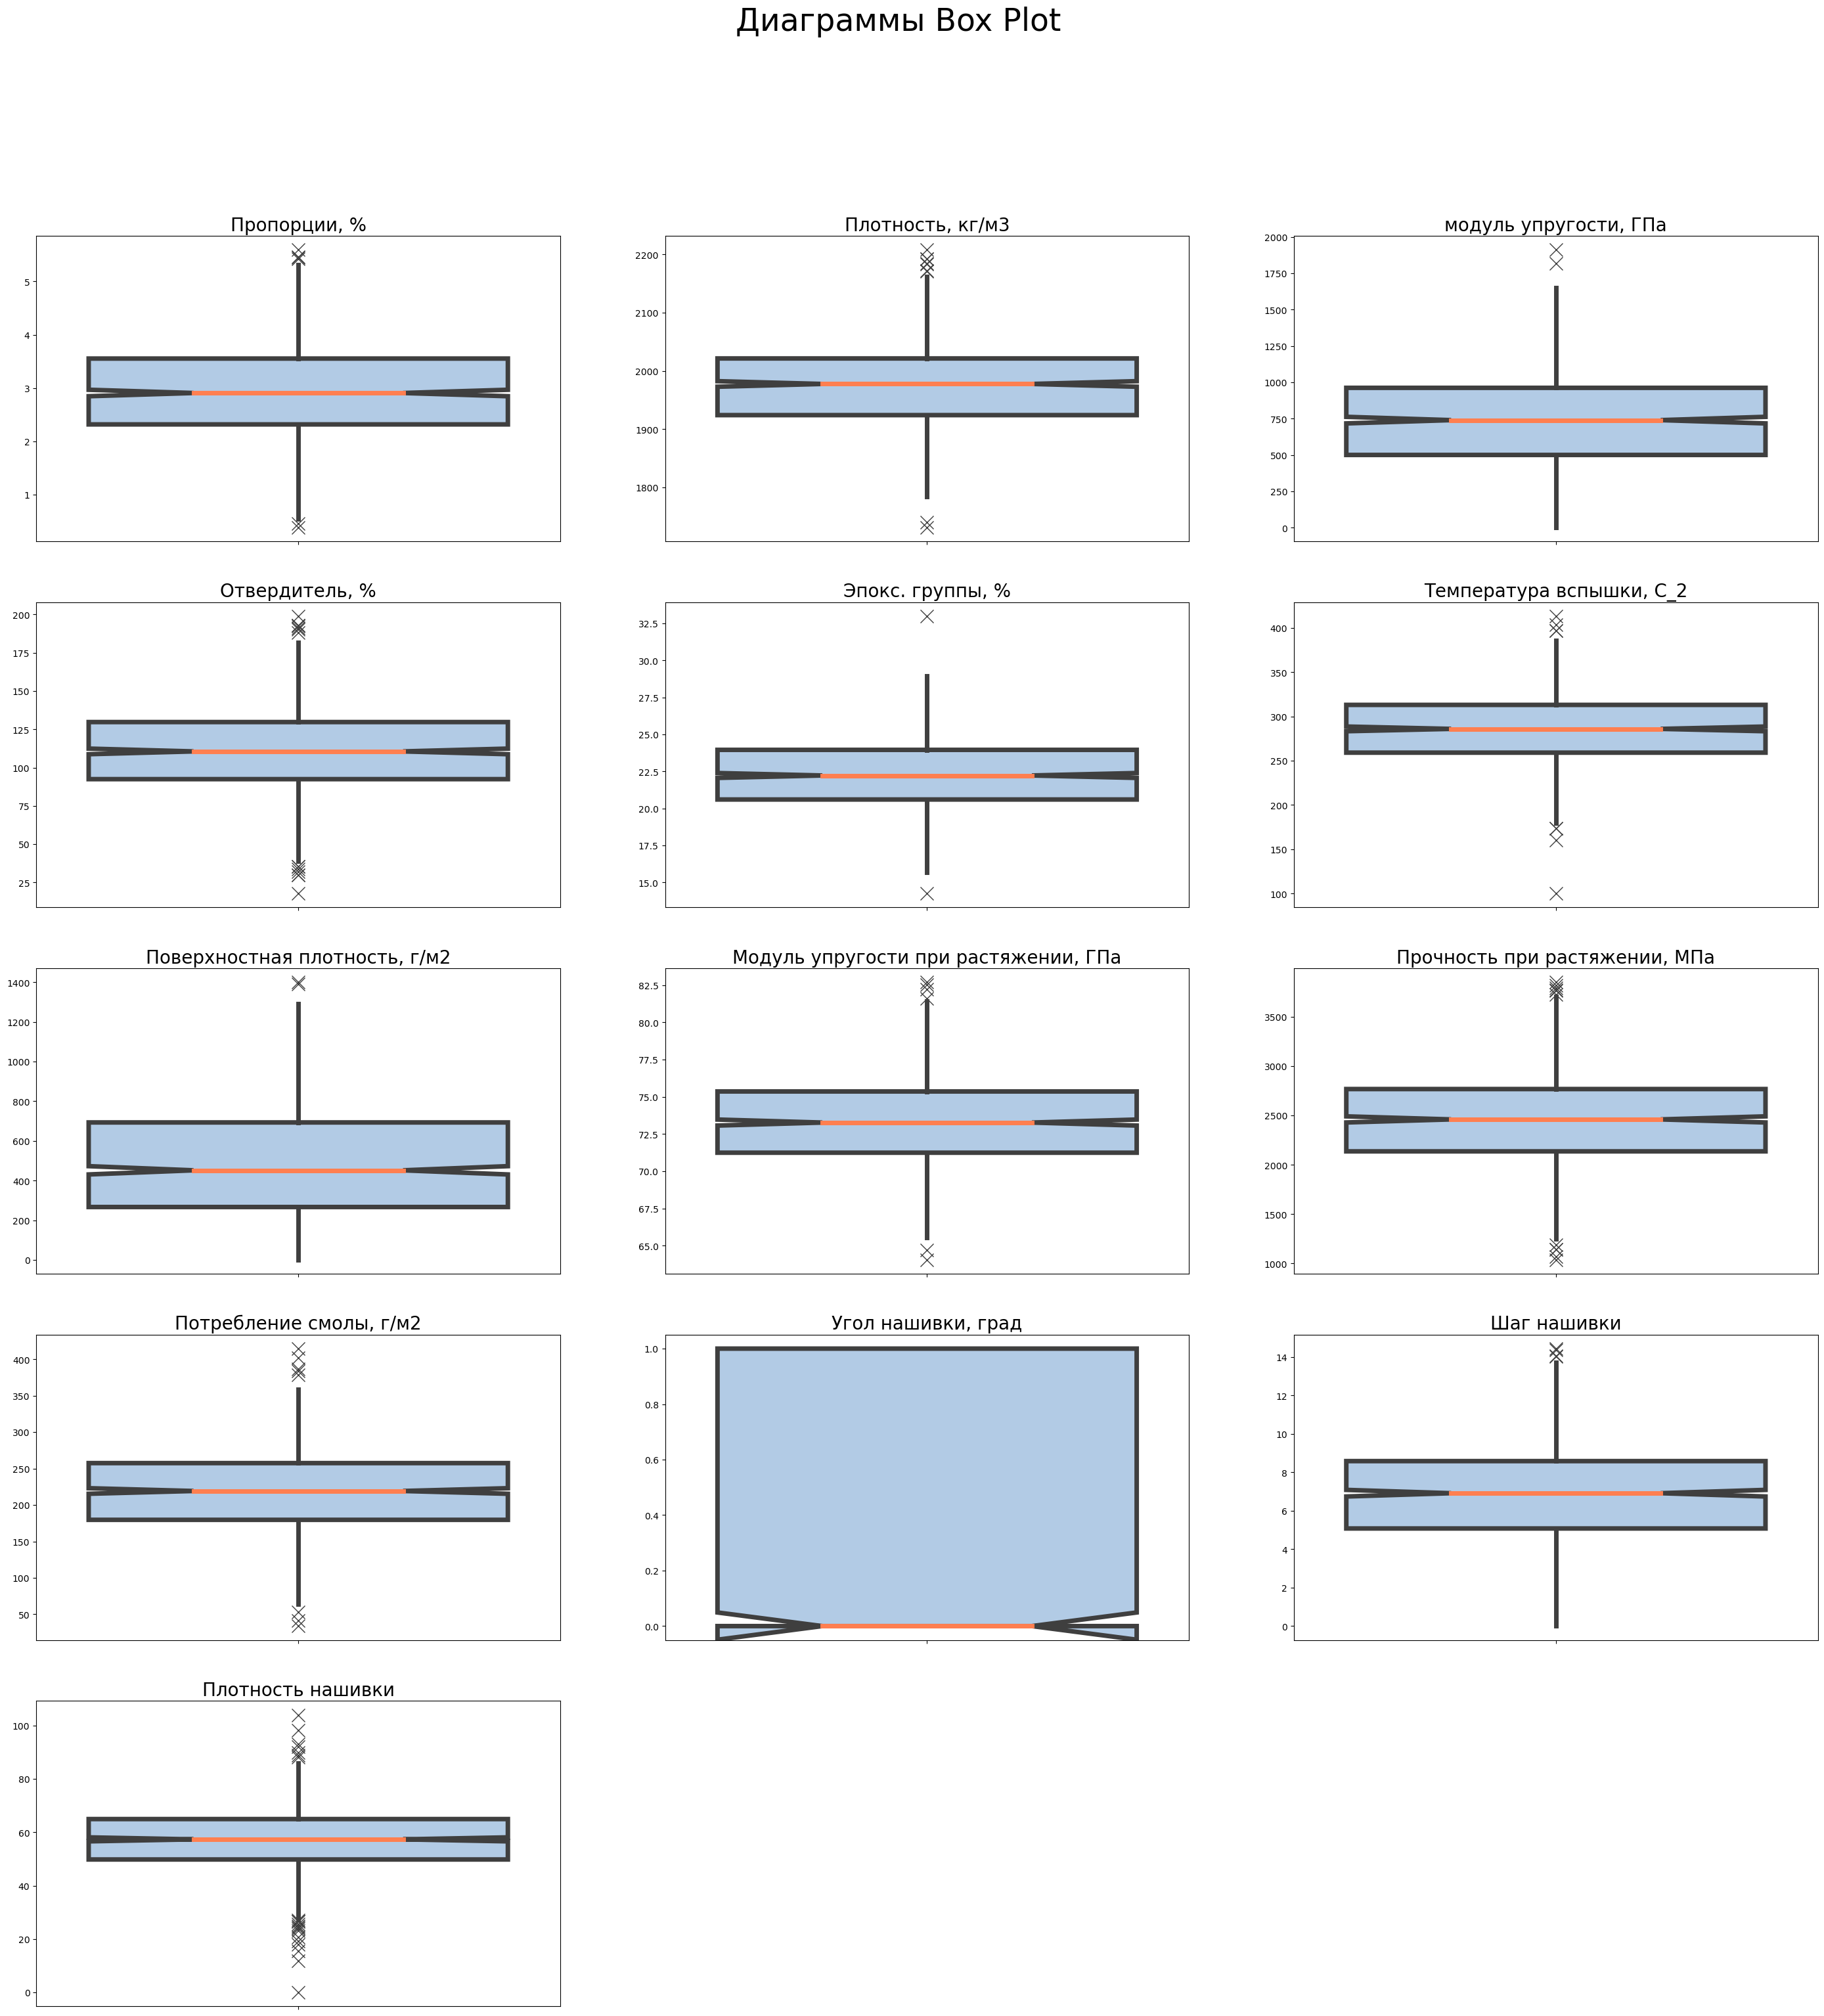

In [33]:
x2 = 5 # строки
y2 = 3 # столбцы
count2 = 1 # счётчик рисунков

plt.figure(figsize = (35,35))
plt.suptitle('Диаграммы Box Plot', fontsize = 34)
for cl2 in result.columns:
  plt.subplot(x2, y2, count2)
  sns.boxplot(data = result, y = result[cl2], fliersize = 15, linewidth = 5, boxprops={"facecolor": (.4, .6, .8, .5)}, 
              notch=True, showcaps=False, flierprops={"marker": "x"}, medianprops={"color": "coral"}, )
  plt.ylabel(None)
  plt.title(cl2, size = 20)
  count2 += 1


### В ячейке выше в соответствии с заданием командами result.median()  и  result.mean() уже были выведены значения среднего и медианного значений, но попробуем вывести их повторно с использованием циклов по столбцам  

In [44]:
count3 = 0 # счётчик столбцов

for cl3 in result.columns:
    print(cl3 + ', ', "среднее значение   = ", np.mean(result[cl3]))
    print(cl3 + ', ', "медианное значение = ", np.median(result[cl3]))
    count3 += 1

Пропорции, %,  среднее значение   =  2.9303657734325483
Пропорции, %,  медианное значение =  2.90687765033521
Плотность, кг/м3,  среднее значение   =  1975.7348881101545
Плотность, кг/м3,  медианное значение =  1977.62165679058
модуль упругости, ГПа,  среднее значение   =  739.9232327560721
модуль упругости, ГПа,  медианное значение =  739.664327697792
Отвердитель, %,  среднее значение   =  110.57076864736254
Отвердитель, %,  медианное значение =  110.564839894065
Эпокс. группы, %,  среднее значение   =  22.24438954776773
Эпокс. группы, %,  медианное значение =  22.2307437560244
Температура вспышки, С_2,  среднее значение   =  285.88215135162187
Температура вспышки, С_2,  медианное значение =  285.896812331237
Поверхностная плотность, г/м2,  среднее значение   =  482.73183303841853
Поверхностная плотность, г/м2,  медианное значение =  451.86436518306
Модуль упругости при растяжении, ГПа,  среднее значение   =  73.32857125009068
Модуль упругости при растяжении, ГПа,  медианное значение 

#### Сохраняем промежуточную версию датасета (пока с выбросами) на диск. Файл result 

In [55]:
result.to_excel("/home/alexander/Документы/BKP/result.xlsx")

## Приступим к обработке выбросов 

#### Смотрим типы переменных и их количество.

In [45]:
result = pd.DataFrame(data = result,)
result.dtypes

Пропорции, %                            float64
Плотность, кг/м3                        float64
модуль упругости, ГПа                   float64
Отвердитель, %                          float64
Эпокс. группы, %                        float64
Температура вспышки, С_2                float64
Поверхностная плотность, г/м2           float64
Модуль упругости при растяжении, ГПа    float64
Прочность при растяжении, МПа           float64
Потребление смолы, г/м2                 float64
Угол нашивки, град                        int64
Шаг нашивки                             float64
Плотность нашивки                       float64
dtype: object

### Посчитаем выбросы в одном столбце датасета; например, столбец №2 = 'Пропорции, %'
### Вычисления проводим по правилу 3 sigma: 

In [52]:
L_Min_pr = result['Пропорции, %'].mean() - 3 * result['Пропорции, %'].std()
L_Max_pr = result['Пропорции, %'].mean() + 3 * result['Пропорции, %'].std()

outlayers_pr = (result['Пропорции, %'] > L_Max_pr).sum() + (result['Пропорции, %'] < L_Min_pr).sum()

print('Выбросов всего в столбце Пропорции, %         = ', outlayers_pr)             
print('Среднее значение в  в столбце Пропорции, %    = ', result['Пропорции, %'].mean().round(3))
print('Стандартное отклонение в столбце Пропорции, % = ', result['Пропорции, %'].std())


Выбросов всего в столбце Пропорции, %         =  0
Среднее значение в  в столбце Пропорции, %    =  2.93
Стандартное отклонение в столбце Пропорции, % =  0.9132222362148383


#### В столбце №2 = 'Пропорции, %' выбросы за пределы 3 сигм не обнаружено. Теперь посмотрим на все остальные столбцы по методу 3 сигм. Напечатаем количество выбросов в каждом столбце, определённые по методу 3 sigma с использованием цикла, значения LineMin и LineMax задают границы значений переменных, при выходе за которые по правилу 3 sigm будем считать их выбросами. 

In [53]:
out_layers = 0
for cl5 in result.columns:
    LineMin = result[cl5].mean() - 3 * result[cl5].std()
    LineMax = result[cl5].mean() + 3 * result[cl5].std()
    
    outlayers = (result[cl5] > LineMax).sum() + (result[cl5] < LineMin).sum()
    out_layers += outlayers
    print('Столбец =', cl5, '      Выбросов всего = ', outlayers,
         '     Вверх = ', (result[cl5] > LineMax).sum(), 
         '     Вниз =', (result[cl5] < LineMin).sum(), )
print('\n')  
print('Всего выбросов по датасету по методу 3 sigma = ', out_layers)


Столбец = Пропорции, %       Выбросов всего =  0      Вверх =  0      Вниз = 0
Столбец = Плотность, кг/м3       Выбросов всего =  3      Вверх =  1      Вниз = 2
Столбец = модуль упругости, ГПа       Выбросов всего =  2      Вверх =  2      Вниз = 0
Столбец = Отвердитель, %       Выбросов всего =  2      Вверх =  1      Вниз = 1
Столбец = Эпокс. группы, %       Выбросов всего =  2      Вверх =  1      Вниз = 1
Столбец = Температура вспышки, С_2       Выбросов всего =  3      Вверх =  1      Вниз = 2
Столбец = Поверхностная плотность, г/м2       Выбросов всего =  2      Вверх =  2      Вниз = 0
Столбец = Модуль упругости при растяжении, ГПа       Выбросов всего =  0      Вверх =  0      Вниз = 0
Столбец = Прочность при растяжении, МПа       Выбросов всего =  0      Вверх =  0      Вниз = 0
Столбец = Потребление смолы, г/м2       Выбросов всего =  3      Вверх =  2      Вниз = 1
Столбец = Угол нашивки, град       Выбросов всего =  0      Вверх =  0      Вниз = 0
Столбец = Шаг нашивки    

#### Как можно видеть, по методу 3 сигм общее количество выбросов = 24

#### Напечатаем количество выбросов в каждом столбце по методу межквартильных расстояний с использованием цикла, границы значений переменных задаются LineMin_q и LineMax_q, при выходе за которые по правилу межквартильных расстояний будем считать их выбросами.

In [55]:
out_layers_q = 0


for cl6 in result.columns:
	
	quantile_025 = np.quantile(result[cl6], 0.25)
	quantile_075 = np.quantile(result[cl6], 0.75)
	
	inter_q = quantile_075 - quantile_025
	# inter_q = np.quantile(result[cl6], 0.75) - np.quantile(result[cl6], 0.25)
	
	LineMin_q = np.quantile(result[cl6], 0.25) - 1.5 * inter_q
	LineMax_q = np.quantile(result[cl6], 0.75) + 1.5 * inter_q

	outlayers_q = (result[cl6] > LineMax_q).sum() + (result[cl6] < LineMin_q).sum()
			
	out_layers_q += outlayers_q
    
	print('Столбец =', cl6, '     Выбросов всего = ', outlayers_q,
         '     Вверх = ', (result[cl6] > LineMax_q).sum(), 
         '     Вниз =', (result[cl6] < LineMin_q).sum(), )
print('\n')
print('Всего выбросов по датасету по методу межквартильных расстояний = ', out_layers_q)

Столбец = Пропорции, %      Выбросов всего =  6      Вверх =  4      Вниз = 2
Столбец = Плотность, кг/м3      Выбросов всего =  9      Вверх =  7      Вниз = 2
Столбец = модуль упругости, ГПа      Выбросов всего =  2      Вверх =  2      Вниз = 0
Столбец = Отвердитель, %      Выбросов всего =  14      Вверх =  7      Вниз = 7
Столбец = Эпокс. группы, %      Выбросов всего =  2      Вверх =  1      Вниз = 1
Столбец = Температура вспышки, С_2      Выбросов всего =  8      Вверх =  4      Вниз = 4
Столбец = Поверхностная плотность, г/м2      Выбросов всего =  2      Вверх =  2      Вниз = 0
Столбец = Модуль упругости при растяжении, ГПа      Выбросов всего =  6      Вверх =  4      Вниз = 2
Столбец = Прочность при растяжении, МПа      Выбросов всего =  11      Вверх =  6      Вниз = 5
Столбец = Потребление смолы, г/м2      Выбросов всего =  8      Вверх =  5      Вниз = 3
Столбец = Угол нашивки, град      Выбросов всего =  0      Вверх =  0      Вниз = 0
Столбец = Шаг нашивки      Выбросо

#### Сравним количество выбросов по методам 3 сигма и межквартильных расстояний 

In [56]:
print('Всего выбросов по датасету по методу 3 sigma                   = ', out_layers)
print('Всего выбросов по датасету по методу межквартильных расстояний = ', out_layers_q)

Всего выбросов по датасету по методу 3 sigma                   =  24
Всего выбросов по датасету по методу межквартильных расстояний =  93


#### Удалим то, что определено как "выброс" по методу межквартильных расстояний и проверим общее количество строк в массиве после удаления выбросов 

In [58]:
quantile_025 = result.quantile(q = 0.25)
quantile_075 = result.quantile(q = 0.75)
	
inter_q = quantile_075 - quantile_025
	
LineMin_quantile = quantile_025 - 1.5 * inter_q
LineMax_quantile = quantile_075 + 1.5 * inter_q
	
result_clean = result[~((result > LineMax_quantile) | (result < LineMin_quantile)).any(axis=1)]
print('Строк в массиве до удаления выбросов    =', len(result.index))
print('Строк в массиве после удаления выбросов =', len(result_clean.index))

Строк в массиве до удаления выбросов    = 1023
Строк в массиве после удаления выбросов = 936


#### Видим, что осталось 936 строк из 1023. Для справки сравним вычисленные значения нижней границы выбросов для Плотность нашивки, определённые:
#### 1. по методу 3sigma в цикле (как последнее значение в памяти, оставшееся при выходе из цикла)
#### 2. по методу межквартильного расстояния в цикле (как последнее значение в памяти, оставшееся при выходе из цикла)
#### 3. по методу межквартильного расстояния командой result.quantile(q = 0.25) 

In [59]:
print('по методу 3sigma в цикле                     =', LineMin)
print('по методу межквартильного расстояния в цикле =', LineMin_q)
print('командой result.quantile(q = 0.25)           =', LineMin_quantile['Плотность нашивки'])

по методу 3sigma в цикле                     = 20.101023036903705
по методу межквартильного расстояния в цикле = 27.08058869124911
командой result.quantile(q = 0.25)           = 27.08058869124911


### Посмотрим, что получилось и отрисуем BoxPlot после удаления выбросов

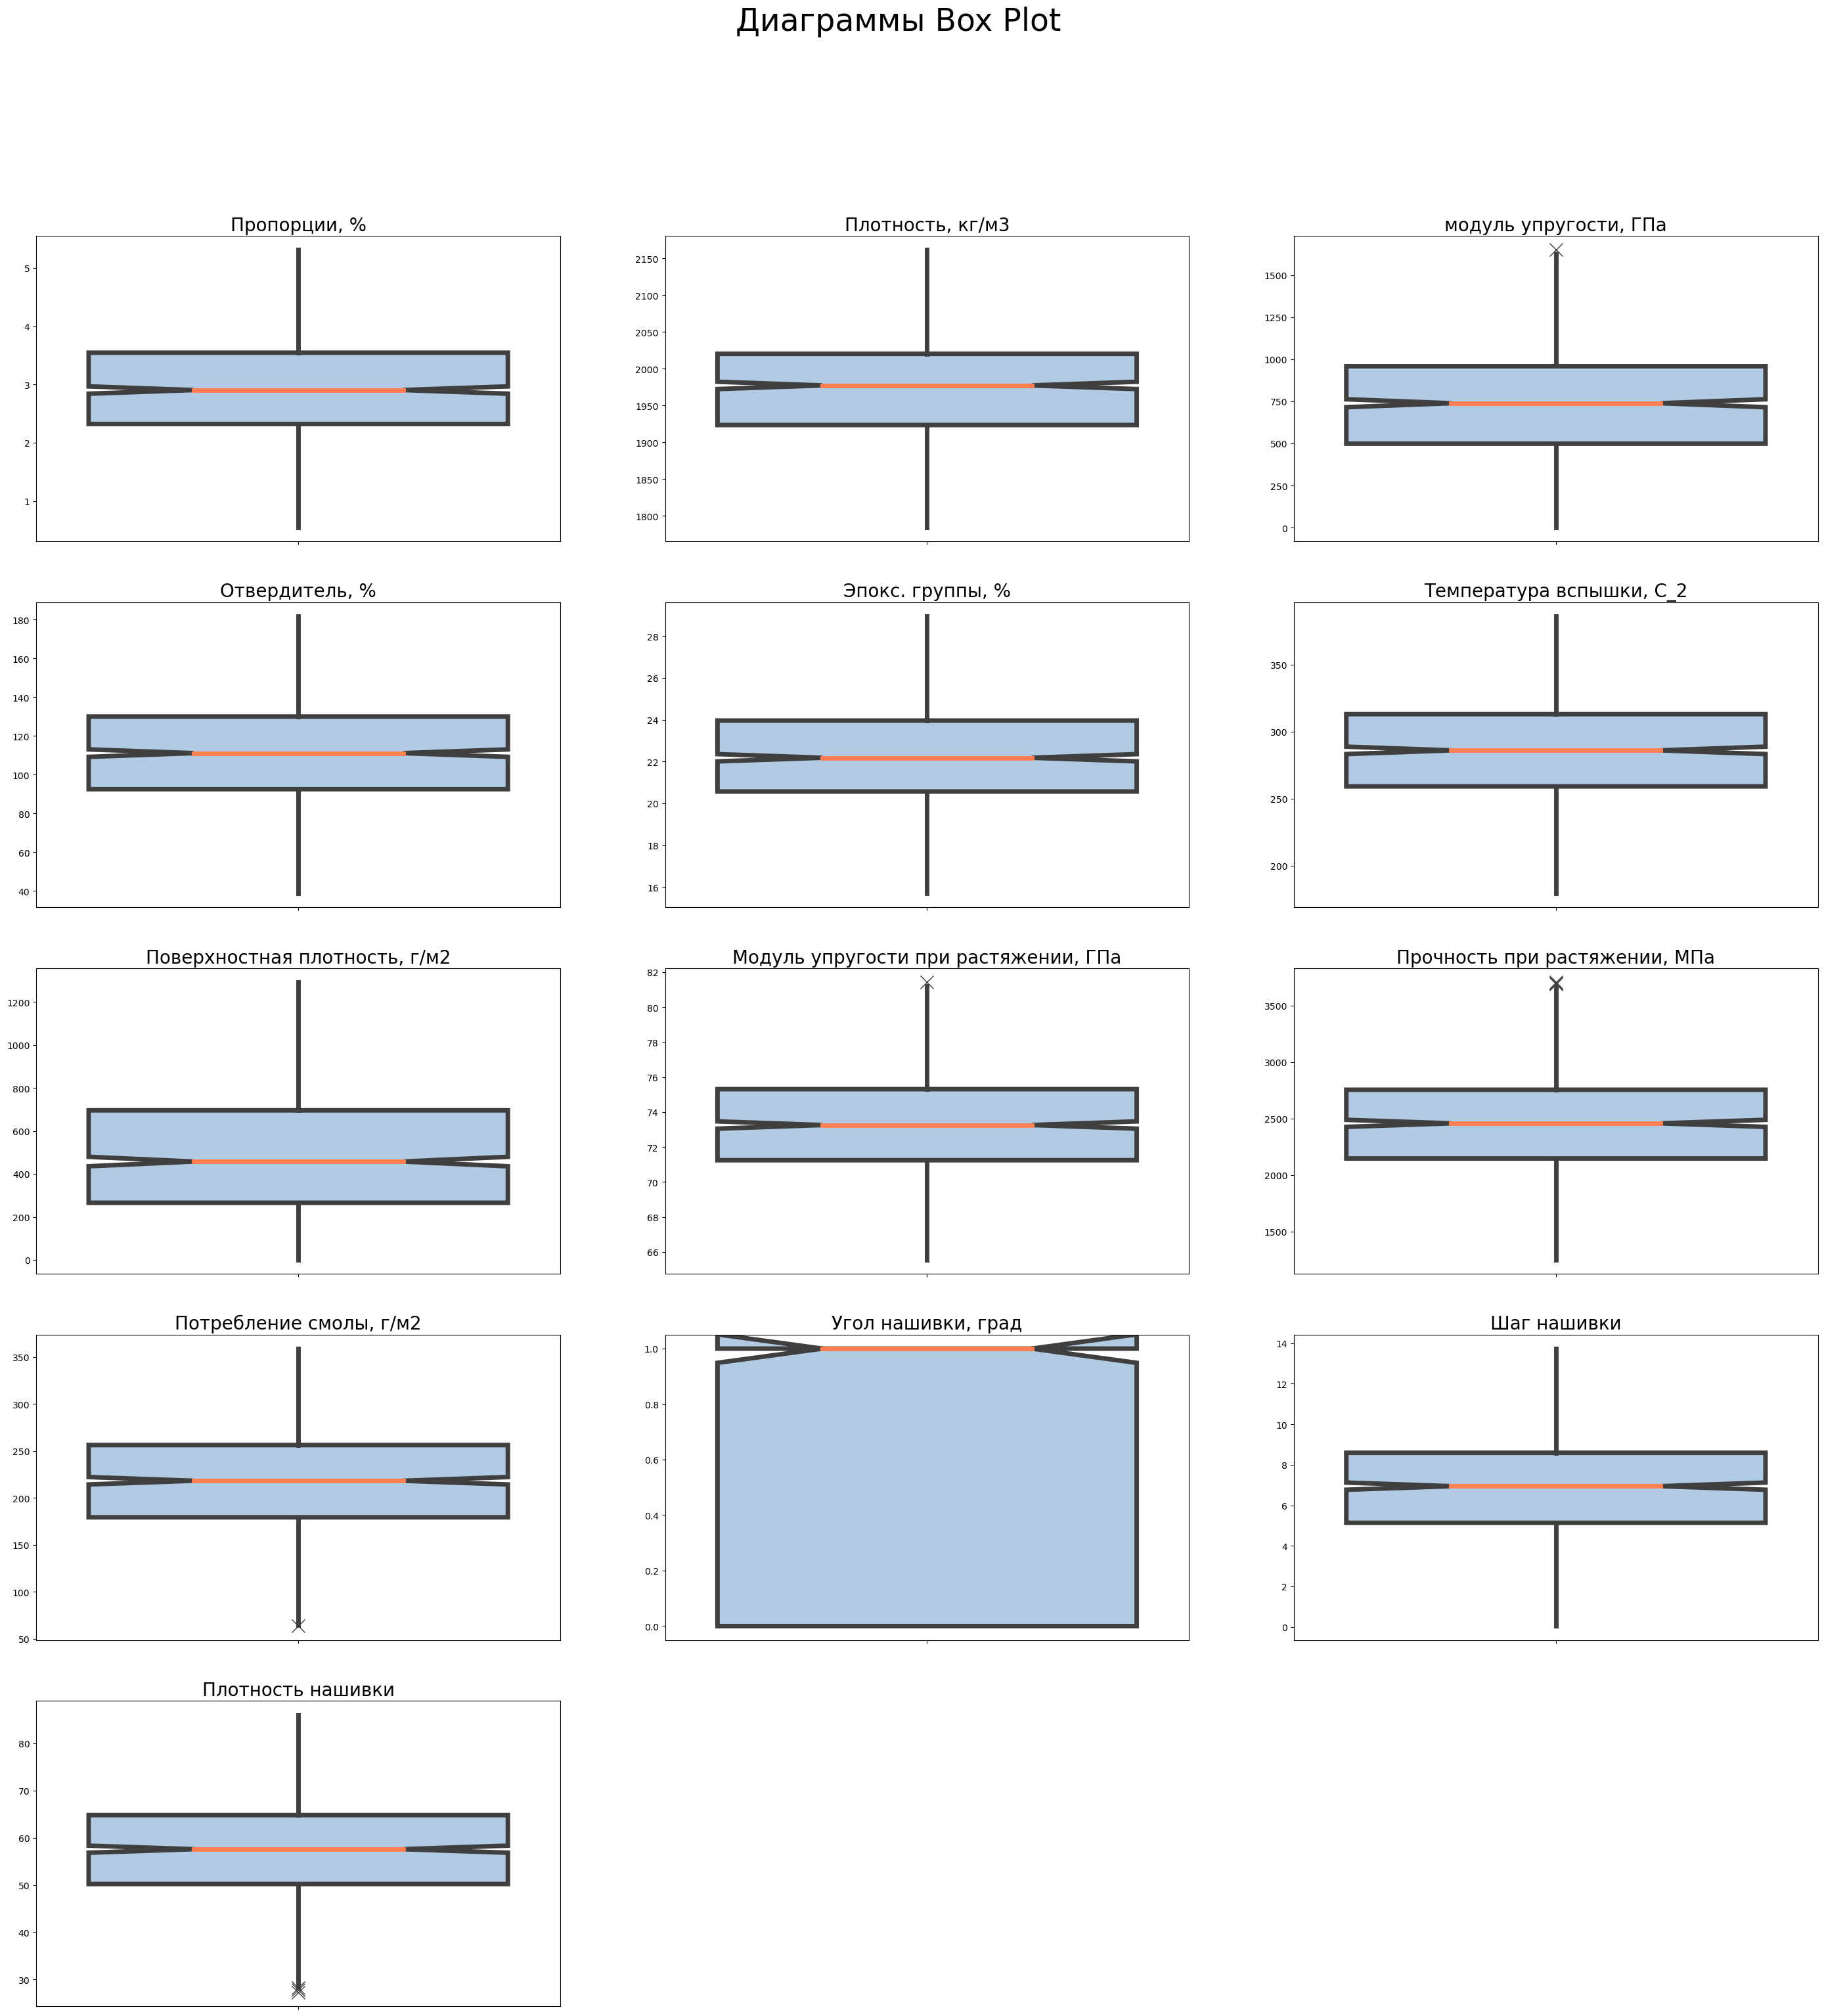

In [60]:
x2 = 5 # строки
y2 = 3 # столбцы
count2 = 1 # счётчик рисунков

plt.figure(figsize = (35,35))
plt.suptitle('Диаграммы Box Plot', fontsize = 34)
for cl7 in result_clean.columns:
  plt.subplot(x2, y2, count2)
  sns.boxplot(data = result_clean, y = result_clean[cl7], fliersize = 15, linewidth = 5, 
              boxprops={"facecolor": (.4, .6, .8, .5)}, 
              notch=True, showcaps=False, flierprops={"marker": "x"}, 
              medianprops={"color": "coral"}, )
  plt.ylabel(None)
  plt.title(cl7, size = 20)
  count2 += 1

#### В небольшом количестве выбросы присутствуют в столбцах "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", но дальнейшее удаление строк ещё сократит наш небольшой датасет и, кроме того, нет уверенности, что при продолжении очистки данных методом удаления строк мы не потеряем какие-то закономерности. 

#### Рисуем гистограммы после удаления выбросов

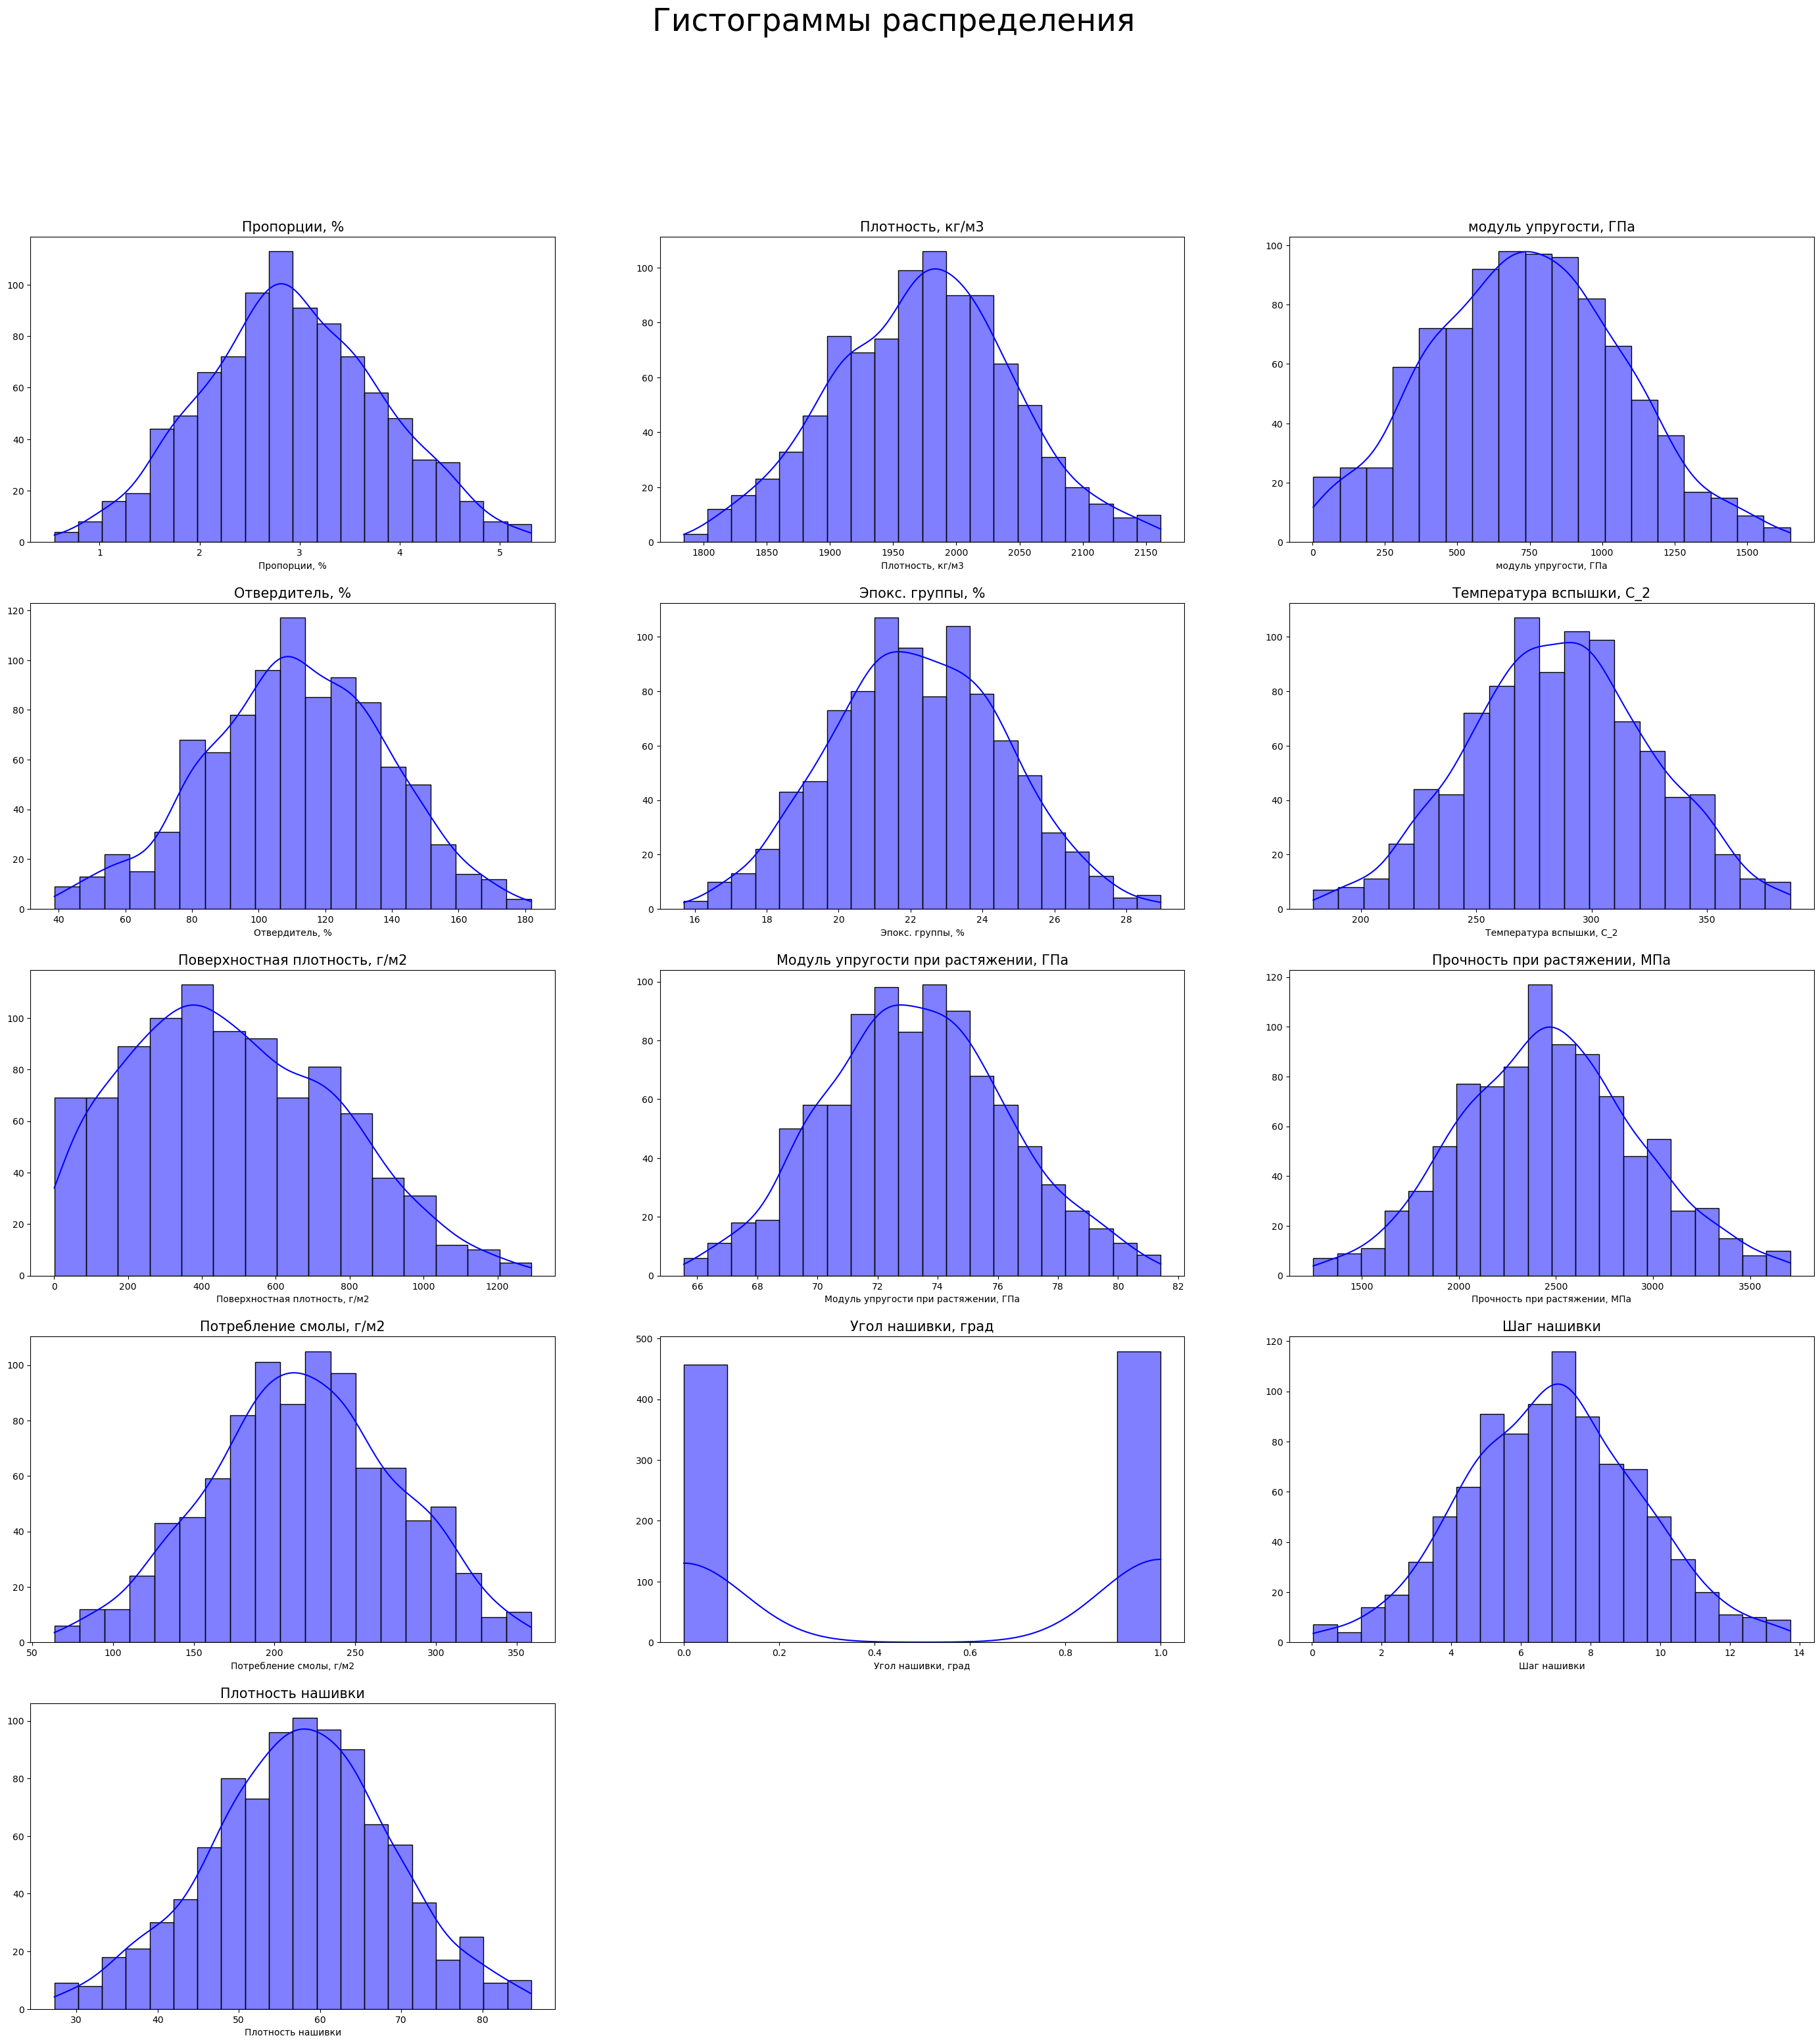

In [61]:
x = 5 # строки
y = 3 # столбцы
count1 = 1 # счётчик рисунков
plt.figure(figsize = (35,35))
plt.suptitle(' Гистограммы распределения ', fontsize = 34)
for cl9 in result_clean.columns:
  plt.subplot(x, y, count1)
  sns.histplot(data = result_clean[cl9], kde=True, color = "blue")
  plt.ylabel(None)
  plt.title(cl9, size = 15)
  count1 += 1

Text(0, 0.5, 'Плотность нашивки')

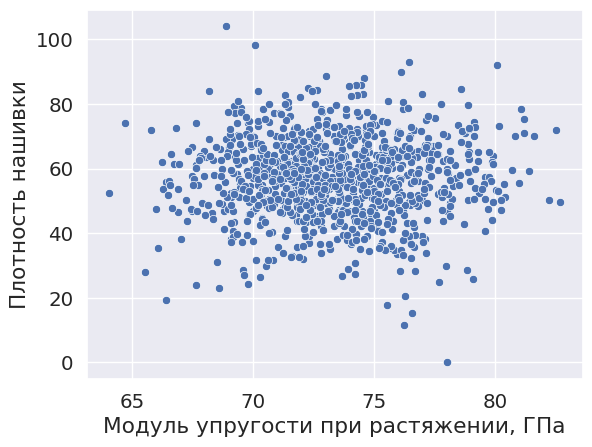

In [62]:
sns.set(font_scale=1.3)
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.scatterplot(x='Модуль упругости при растяжении, ГПа',  y='Плотность нашивки', data=result)
plt.xlabel('Модуль упругости при растяжении, ГПа')
plt.ylabel('Плотность нашивки')

#### На примере пары "Плотность нашивки" - "Модуль упругости при растяжении" наблюдается отсутствие корреляции. Это странно, так как плотность нашивки - это по описанию количество армирующего волокна в композите, и увеличение армирующего компонента теоретически должно давать прирост модуля упругости, чего на данном графике не просматривается. 

<Axes: xlabel='Модуль упругости при растяжении, ГПа', ylabel='Count'>

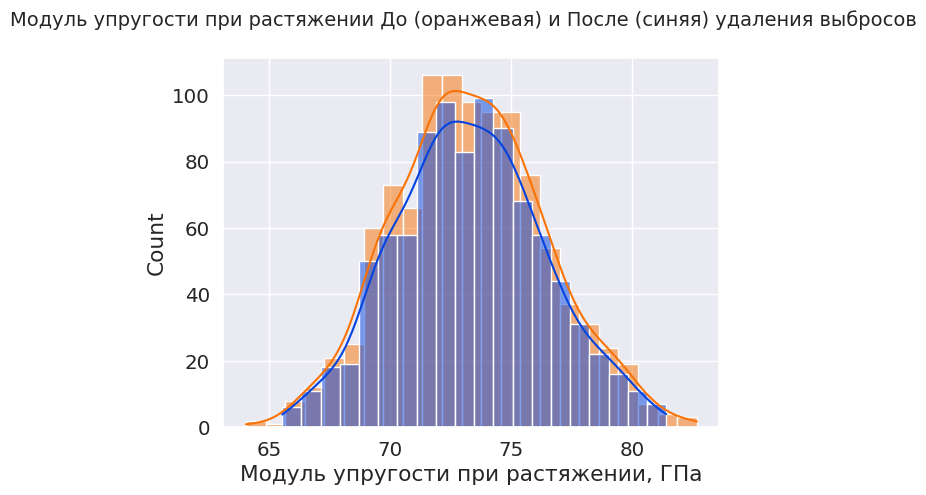

In [63]:
plt.suptitle('Модуль упругости при растяжении До (оранжевая) и После (синяя) удаления выбросов', fontsize = 14)
sns.histplot(data = result["Модуль упругости при растяжении, ГПа"], kde=True, color = "#f97306")
sns.histplot(data = result_clean["Модуль упругости при растяжении, ГПа"], kde=True, color = "#0343df")

<Axes: xlabel='Прочность при растяжении, МПа', ylabel='Count'>

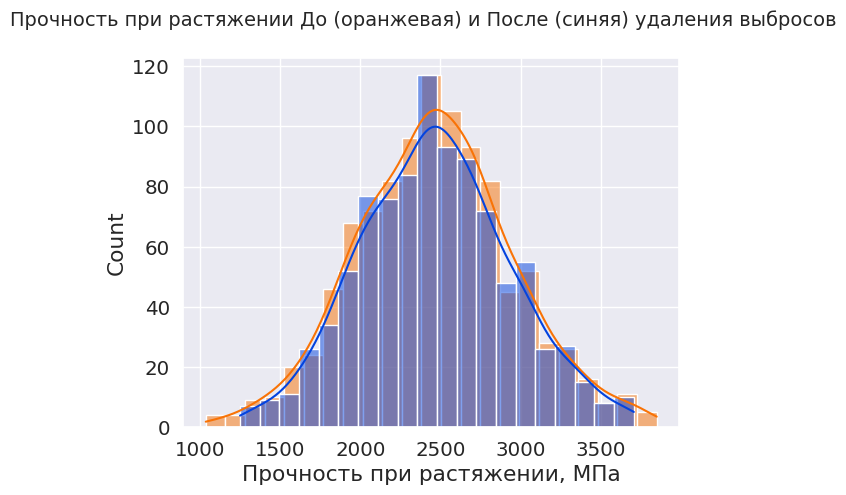

In [64]:

plt.suptitle('Прочность при растяжении До (оранжевая) и После (синяя) удаления выбросов', fontsize = 14)
sns.histplot(data = result["Прочность при растяжении, МПа"], kde=True, color = "#f97306")
sns.histplot(data = result_clean["Прочность при растяжении, МПа"], kde=True, color = "#0343df")

<Axes: xlabel='Потребление смолы, г/м2', ylabel='Count'>

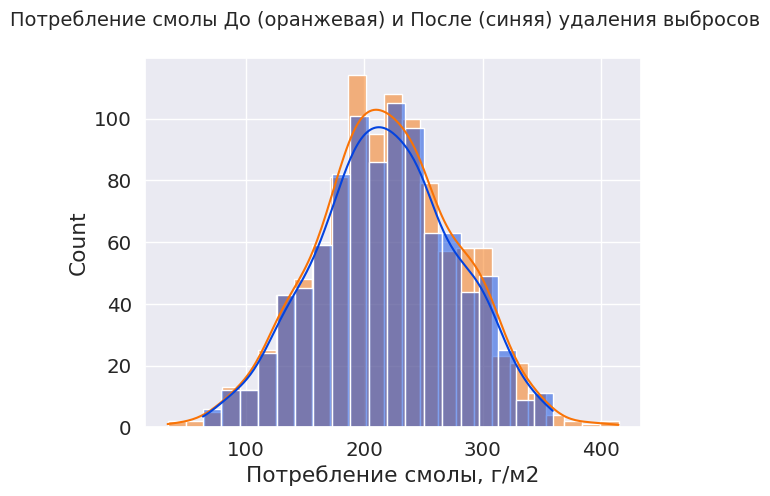

In [65]:
plt.suptitle('Потребление смолы До (оранжевая) и После (синяя) удаления выбросов', fontsize = 14)
sns.histplot(data = result["Потребление смолы, г/м2"], kde=True, color = "#f97306")
sns.histplot(data = result_clean["Потребление смолы, г/м2"], kde=True, color = "#0343df")

#### Видно, что удалены малые значения на краях кривой распределения, кривая нормального распределения стала более гладкой, но усилился "провал" в районе медианного значения. Сохраняем данные в csv и excel форматы: 
#### result_clean.to_csv('/home/alexander/Документы/BKP/result_clean.csv', encoding = 'cp1251' )
#### result_clean.to_excel("/home/alexander/Документы/BKP/result_clean.xlsx")

In [ ]:
result_clean.to_csv('/home/alexander/Документы/BKP/result_clean.csv', encoding = 'cp1251' )
result_clean.to_excel("/home/alexander/Документы/BKP/result_clean.xlsx")
result_clean.columns.tolist()

#### Диапазоны значений величин разные и для загрузки датасета в регрессоры их необходимо нормализовать.